# **Business Case: Delhivery - Feature Engineering**

**About Delhivery:**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities. The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

**How can you help here?**

The company wants to understand and process the data coming out of data engineering pipelines:

•   Clean, sanitize and manipulate data to get useful features out of raw fields

•   Make sense out of the raw data and help the data science team to build forecasting models on it

## **Importing Required Libraries**

In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
import scipy.stats as spy
warnings.simplefilter('ignore')

df=pd.read_csv("/content/delhivery_data.csv")

In [318]:
df.shape

(144867, 24)

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [320]:
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


**Dropping Unknown Fields:**

In [321]:
# Dropping Unknown fields
unknown = ['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor']
df.drop(columns=unknown,inplace=True)

In [322]:
# Unique entries in columns

for i in df.columns:
  print(f"Unique Entries in {i} column: {df[i].nunique()}")

Unique Entries in data column: 2
Unique Entries in trip_creation_time column: 14817
Unique Entries in route_schedule_uuid column: 1504
Unique Entries in route_type column: 2
Unique Entries in trip_uuid column: 14817
Unique Entries in source_center column: 1508
Unique Entries in source_name column: 1498
Unique Entries in destination_center column: 1481
Unique Entries in destination_name column: 1468
Unique Entries in od_start_time column: 26369
Unique Entries in od_end_time column: 26369
Unique Entries in start_scan_to_end_scan column: 1915
Unique Entries in actual_distance_to_destination column: 144515
Unique Entries in actual_time column: 3182
Unique Entries in osrm_time column: 1531
Unique Entries in osrm_distance column: 138046
Unique Entries in segment_actual_time column: 747
Unique Entries in segment_osrm_time column: 214
Unique Entries in segment_osrm_distance column: 113799


**Converting Data and Route type columns to Category**

In [323]:
# Converting date and route_type column to category columns:

df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')

In [324]:
float_cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time','osrm_distance','segment_actual_time','segment_osrm_time','segment_osrm_distance']

for i in float_cols:
  print(df[i].max())

7898.0
1927.4477046975032
4532.0
1686.0
2326.1991000000003
3051.0
1611.0
2191.4037000000003


In [325]:
for i in float_cols:
  df[i] = df[i].astype('float32')

**Updating date & time columns to datetime datatypes:**

In [326]:
# Updating date & time columns to datetime data type

datetime_cols = ['trip_creation_time','od_start_time','od_end_time']

for i in datetime_cols:
  df[i] =  pd.to_datetime(df[i])

**Checking for Null Values in dataframe**

In [327]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

**Insight**: Memory usage has been reduced to 14.6 MB from 25.6 MB , reduction of 43%.

## **Data Exploration**

**Time Period if data given:**

In [329]:
df['trip_creation_time'].min(), df['trip_creation_time'].max()

(Timestamp('2018-09-12 00:00:16.535741'),
 Timestamp('2018-10-03 23:59:42.701692'))

**Checking Missing Source Name and Destination Name:**

In [330]:
missing_source_name = df['source_center'][df['source_name'].isna()].unique()
missing_source_name


array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [331]:
for i in missing_source_name:
  unique_source_name = df.loc[df['source_center']==i,'source_name'].unique()
  if pd.isna(unique_source_name):
    print(f"Source Name : {i}    Source Center : Not Found")
  else:
    print(f"Source Name : {i}    Source Center : {unique_source_name}")

Source Name : IND342902A1B    Source Center : Not Found
Source Name : IND577116AAA    Source Center : Not Found
Source Name : IND282002AAD    Source Center : Not Found
Source Name : IND465333A1B    Source Center : Not Found
Source Name : IND841301AAC    Source Center : Not Found
Source Name : IND509103AAC    Source Center : Not Found
Source Name : IND126116AAA    Source Center : Not Found
Source Name : IND331022A1B    Source Center : Not Found
Source Name : IND505326AAB    Source Center : Not Found
Source Name : IND852118A1B    Source Center : Not Found


In [332]:
missing_destination_name = df['destination_center'][df['destination_name'].isna()].unique()
missing_destination_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [333]:
for i in missing_destination_name:
  unique_destination_name = df.loc[df['destination_center']==i,'destination_name'].unique()
  if pd.isna(unique_destination_name):
    print(f" Destination Name  : {i}    Destination Center : Not Found")
  else:
    print(f" Destination Name : {i}    Destination Center : {unique_destination_name}")

 Destination Name  : IND342902A1B    Destination Center : Not Found
 Destination Name  : IND577116AAA    Destination Center : Not Found
 Destination Name  : IND282002AAD    Destination Center : Not Found
 Destination Name  : IND465333A1B    Destination Center : Not Found
 Destination Name  : IND841301AAC    Destination Center : Not Found
 Destination Name  : IND505326AAB    Destination Center : Not Found
 Destination Name  : IND852118A1B    Destination Center : Not Found
 Destination Name  : IND126116AAA    Destination Center : Not Found
 Destination Name  : IND509103AAC    Destination Center : Not Found
 Destination Name  : IND221005A1A    Destination Center : Not Found
 Destination Name  : IND250002AAC    Destination Center : Not Found
 Destination Name  : IND331001A1C    Destination Center : Not Found
 Destination Name  : IND122015AAC    Destination Center : Not Found


**Checking ID for which source name is missing are all those Destination also missing:**

In [334]:
np.all(df.loc[df['source_name'].isna(),'source_center'].isin(missing_destination_name))

np.False_

**Treating missing destination names and source names**

In [335]:
# Assign placeholder names like location_1, location_2, etc.
for i, center in enumerate(missing_destination_name, start=1):
    df.loc[df['destination_center'] == center, 'destination_name'] = \
        df.loc[df['destination_center'] == center, 'destination_name'].fillna(f'location_{i}')

d2 = {}
count = len(missing_destination_name) + 1  # Continue numbering from where Part 1 left off

for center in missing_source_name:
    names = df.loc[df['destination_center'] == center, 'destination_name'].dropna().unique()
    # Use existing name if found, else assign a new location
    d2[center] = names[0] if len(names) > 0 else f'location_{count}'
    if len(names) == 0:
        count += 1

for center, name in d2.items():
    print(center, name)

IND342902A1B location_1
IND577116AAA location_2
IND282002AAD location_3
IND465333A1B location_4
IND841301AAC location_5
IND509103AAC location_9
IND126116AAA location_8
IND331022A1B location_14
IND505326AAB location_6
IND852118A1B location_7


In [336]:
for i in missing_source_name:
  df.loc[df['source_center']==i,'source_name'] = df.loc[df['source_center']==i,'source_name'].replace(np.nan,d2[i])

In [337]:
df.source_name.value_counts()

,count
source_name,
Gurgaon_Bilaspur_HB (Haryana),23347
Bangalore_Nelmngla_H (Karnataka),9975
Bhiwandi_Mankoli_HB (Maharashtra),9088
Pune_Tathawde_H (Maharashtra),4061
Hyderabad_Shamshbd_H (Telangana),3340
...,...
Allahabad_Mirapati_L (Uttar Pradesh),1
Vadodara_Karelibaug_DC (Gujarat),1
Islampure_ShbdnDPP_D (West Bengal),1


In [338]:
df.destination_name.value_counts()

,count
destination_name,
Gurgaon_Bilaspur_HB (Haryana),15192
Bangalore_Nelmngla_H (Karnataka),11019
Bhiwandi_Mankoli_HB (Maharashtra),5492
Hyderabad_Shamshbd_H (Telangana),5142
Kolkata_Dankuni_HB (West Bengal),4892
...,...
Koppa_Sangetha_D (Karnataka),1
Dhuri_DMComDPP_D (Punjab),1
Sidhmukh_MnbzrDPP_D (Rajasthan),1


**Insight:**
Even if we replace null values with some values they are not gonna impact on the data, so we can drop it.

In [339]:
# Missing count in source and destination

261+ 293

554

In [340]:
len(df)

144867

In [341]:
(554/144867) *100

0.3824197367240296

In [342]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


**Description of Data:**


In [343]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867,144867,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,961.262939,234.073380,416.927521,213.868286,284.771301,36.196110,18.507547,22.829018
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000046,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,161.000000,23.355875,51.000000,27.000000,29.914701,20.000000,11.000000,12.070100
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,449.000000,66.126572,132.000000,64.000000,78.525803,29.000000,17.000000,23.513000
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,1634.000000,286.708878,513.000000,257.000000,343.193253,40.000000,22.000000,27.813250
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447754,4532.000000,1686.000000,2326.199219,3051.000000,1611.000000,2191.403809
std,NaN,NaN,NaN,1036.997803,344.979126,598.096069,308.004333,421.117462,53.566002,14.770471,17.860197


In [344]:
df.describe(include='object')

,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name
count,144867,144867,144867,144867,144867,144867
unique,1504,14817,1508,1508,1481,1481
top,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,trip-153759210483476123,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,1812,101,23347,23347,15192,15192


In [345]:
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.965300,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.724300,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637280,40.0,28.0,32.539501,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118027,62.0,40.0,45.562000,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.218102,6.0,5.0,3.9153
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,10.403038,15.0,11.0,12.117100,15.0,11.0,12.1171
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,18.045481,44.0,17.0,21.289000,28.0,6.0,9.1719
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,28.061895,65.0,29.0,35.825199,21.0,11.0,14.5362
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,38.939167,76.0,39.0,47.189999,10.0,10.0,11.3648
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.233398,26.0,6.0,6.0434


**Merging or rows and aggregation of fields:**


In [346]:
grouping_1 = ['trip_uuid', 'source_center', 'destination_center']
df1 = df.groupby(grouping_1, as_index = False).agg({'data' : 'first',
                                                         'route_type' : 'first',
                                                       'trip_creation_time' : 'first',
                                                       'source_name' : 'first',
                                                       'destination_name' : 'last',
                                                       'od_start_time' : 'first',
                                                       'od_end_time' : 'first',
                                                       'start_scan_to_end_scan' : 'first',
                                                       'actual_distance_to_destination' : 'last',
                                                       'actual_time' : 'last',
                                                       'osrm_time' : 'last',
                                                       'osrm_distance' : 'last',
                                                       'segment_actual_time' : 'sum',
                                                       'segment_osrm_time' : 'sum',
                                                       'segment_osrm_distance' : 'sum'})

**Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required**

In [347]:
df1['od_total_time'] = df1['od_end_time'] - df1['od_start_time']
df1.drop(columns = ['od_end_time', 'od_start_time'], inplace = True)
df1['od_total_time'] = df1['od_total_time'].apply(lambda x : round(x.total_seconds() / 60.0, 2))
df1['od_total_time'].head()

,od_total_time
0,1260.60
1,999.51
2,58.83
3,122.78
4,834.64


In [348]:
df2 = df1.groupby(by = 'trip_uuid', as_index = False).agg({'source_center' : 'first',
                                                           'destination_center' : 'last',
                                                           'data' : 'first',
                                                           'route_type' : 'first',
                                                           'trip_creation_time' : 'first',
                                                           'source_name' : 'first',
                                                           'destination_name' : 'last',
                                                           'od_total_time' : 'sum',
                                                           'start_scan_to_end_scan' : 'sum',
                                                           'actual_distance_to_destination' : 'sum',
                                                           'actual_time' : 'sum',
                                                           'osrm_time' : 'sum',
                                                           'osrm_distance' : 'sum',
                                                           'segment_actual_time' : 'sum',
                                                           'segment_osrm_time' : 'sum',
                                                           'segment_osrm_distance' : 'sum'})

**2. Build some features to prepare the data for actual analysis. Extract features from the below fields:**

**Source Name: Split and extract features out of destination. City-place-code (State)**

In [349]:
def location_name_to_state(x):
    l = x.split('(')
    if len(l) == 1:
        return l[0]
    else:
        return l[1].replace(')', "")

In [350]:
def location_name_to_city(x):
    if 'location' in x:
        return 'unknown_city'
    else:
        l = x.split()[0].split('_')
        if 'CCU' in x:
            return 'Kolkata'
        elif 'MAA' in x.upper():
            return 'Chennai'
        elif ('HBR' in x.upper()) or ('BLR' in x.upper()):
            return 'Bengaluru'
        elif 'FBD' in x.upper():
            return 'Faridabad'
        elif 'BOM' in x.upper():
            return 'Mumbai'
        elif 'DEL' in x.upper():
            return 'Delhi'
        elif 'OK' in x.upper():
            return 'Delhi'
        elif 'GZB' in x.upper():
            return 'Ghaziabad'
        elif 'GGN' in x.upper():
            return 'Gurgaon'
        elif 'AMD' in x.upper():
            return 'Ahmedabad'
        elif 'CJB' in x.upper():
            return 'Coimbatore'
        elif 'HYD' in x.upper():
            return 'Hyderabad'
        return l[0]

In [351]:
def location_name_to_place(x):
    if 'location' in x:
        return x
    elif 'HBR' in x:
        return 'HBR Layout PC'
    else:
        l = x.split()[0].split('_', 1)
        if len(l) == 1:
            return 'unknown_place'
        else:
            return l[1]

In [352]:
df2['source_state'] = df2['source_name'].apply(location_name_to_state)
df2['source_state'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Assam', 'Madhya Pradesh', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Goa', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Uttarakhand', 'Himachal Pradesh', 'Kerala',
       'Arunachal Pradesh', 'Bihar', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Jammu & Kashmir', 'Mizoram', 'Nagaland',
       'location_9', 'location_3', 'location_2', 'location_14',
       'location_7'], dtype=object)

In [353]:
df2['source_city'] = df2['source_name'].apply(location_name_to_city)
print('No of source cities :', df2['source_city'].nunique())
df2['source_city'].unique()[:100]

No of source cities : 690


array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Bellary', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'Pune', 'Faridabad', 'Shirala',
       'Hyderabad', 'Thirumalagiri', 'Gulbarga', 'Jaipur', 'Allahabad',
       'Guwahati', 'Narsinghpur', 'Shrirampur', 'Madakasira', 'Sonari',
       'Dindigul', 'Jalandhar', 'Chandigarh', 'Deoli', 'Pandharpur',
       'Kolkata', 'Bhandara', 'Kurnool', 'Bhiwandi', 'Bhatinda',
       'RoopNagar', 'Bantwal', 'Lalru', 'Kadi', 'Shahdol', 'Gangakher',
       'Durgapur', 'Vapi', 'Jamjodhpur', 'Jetpur', 'Mehsana', 'Jabalpur',
       'Junagadh', 'Gundlupet', 'Mysore', 'Goa', 'Bhopal', 'Sonipat',
       'Himmatnagar', 'Jamshedpur', 'Pondicherry', 'Anand', 'Udgir',
       'Nadiad', 'Villupuram', 'Purulia', 'Bhubaneshwar', 'Bamangola',
       'Tiruppattur', 'Kotdwara', 'Medak', 'Bangalore', 'Dhrangadhra',
       'Hospet', 'Ghumarwin', 'Agra', 'Sitapur', 'Canacona', 'Bilimora',
       'SultnBthry', 'Lucknow', 'Vellore', 'Bhuj', 'Dinhata',
       'Margheri

In [354]:
df2['source_place'] = df2['source_name'].apply(location_name_to_place)
df2['source_place'].unique()[:100]

array(['Central_H_6', 'ChikaDPP_D', 'Bilaspur_HB', 'unknown_place', 'Dc',
       'Poonamallee', 'Chrompet_DPC', 'HBR Layout PC', 'Central_D_12',
       'Lajpat_IP', 'North_D_3', 'Balabhgarh_DPC', 'Central_DPP_3',
       'Shamshbd_H', 'Xroad_D', 'Nehrugnj_I', 'Central_I_7',
       'Central_H_1', 'Nangli_IP', 'North', 'KndliDPP_D', 'Central_D_9',
       'DavkharRd_D', 'Bandel_D', 'RTCStand_D', 'Central_DPP_1',
       'KGAirprt_HB', 'North_D_2', 'Central_D_1', 'DC', 'Mthurard_L',
       'Mullanpr_DC', 'Central_DPP_2', 'RajCmplx_D', 'Beliaghata_DPC',
       'RjnaiDPP_D', 'AbbasNgr_I', 'Mankoli_HB', 'DPC', 'Airport_H',
       'Hub', 'Gateway_HB', 'Tathawde_H', 'ChotiHvl_DC', 'Trmltmpl_D',
       'OnkarDPP_D', 'Mehmdpur_H', 'KaranNGR_D', 'Sohagpur_D',
       'Chrompet_L', 'Busstand_D', 'Central_I_1', 'IndEstat_I', 'Court_D',
       'Panchot_IP', 'Adhartal_IP', 'DumDum_DPC', 'Bomsndra_HB',
       'Swamylyt_D', 'Yadvgiri_IP', 'Old', 'Kundli_H', 'Central_I_3',
       'Vasanthm_I', 'Poonamallee_

**Destination Name: Split and extract features out of destination. City-place-code (State)**

In [355]:
df2['destination_state'] = df2['destination_name'].apply(location_name_to_state)
df2['destination_state'].head(10)

,destination_state
0,Uttar Pradesh
1,Karnataka
2,Haryana
3,Maharashtra
4,Karnataka
5,Tamil Nadu
6,Tamil Nadu
7,Karnataka
8,Gujarat
9,Delhi


In [356]:
df2['destination_city'] = df2['destination_name'].apply(location_name_to_city)
df2['destination_city'].head()

,destination_city
0,Kanpur
1,Doddablpur
2,Gurgaon
3,Mumbai
4,Sandur


In [357]:
df2['destination_place'] = df2['destination_name'].apply(location_name_to_place)
df2['destination_place'].head()

,destination_place
0,Central_H_6
1,ChikaDPP_D
2,Bilaspur_HB
3,MiraRd_IP
4,WrdN1DPP_D


**Trip_creation_time: Extract features like month, year and day etc**

In [358]:
df2['trip_creation_date'] = pd.to_datetime(df2['trip_creation_time'].dt.date)
df2['trip_creation_date'].head()

,trip_creation_date
0,2018-09-12
1,2018-09-12
2,2018-09-12
3,2018-09-12
4,2018-09-12


In [359]:
df2['trip_creation_day'] = df2['trip_creation_time'].dt.day
df2['trip_creation_day'] = df2['trip_creation_day'].astype('int8')
df2['trip_creation_day'].head()

,trip_creation_day
0,12
1,12
2,12
3,12
4,12


In [360]:
df2['trip_creation_month'] = df2['trip_creation_time'].dt.month
df2['trip_creation_month'] = df2['trip_creation_month'].astype('int8')
df2['trip_creation_month'].head()

,trip_creation_month
0,9
1,9
2,9
3,9
4,9


In [361]:
df2['trip_creation_year'] = df2['trip_creation_time'].dt.year
df2['trip_creation_year'] = df2['trip_creation_year'].astype('int16')
df2['trip_creation_year'].head()

,trip_creation_year
0,2018
1,2018
2,2018
3,2018
4,2018


In [362]:
df2['trip_creation_week'] = df2['trip_creation_time'].dt.isocalendar().week
df2['trip_creation_week'] = df2['trip_creation_week'].astype('int8')
df2['trip_creation_week'].head()

,trip_creation_week
0,37
1,37
2,37
3,37
4,37


In [363]:
df2['trip_creation_hour'] = df2['trip_creation_time'].dt.hour
df2['trip_creation_hour'] = df2['trip_creation_hour'].astype('int8')
df2['trip_creation_hour'].head()

,trip_creation_hour
0,0
1,0
2,0
3,0
4,0


In [364]:
df2.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,14817,2018-09-22 12:44:19.555167744,2018-09-12 00:00:16.535741,2018-09-17 02:51:25.129125888,2018-09-22 04:02:35.066945024,2018-09-27 19:37:41.898427904,2018-10-03 23:59:42.701692,NaN
od_total_time,14817.0,531.69763,23.46,149.93,280.77,638.2,7898.55,658.868223
start_scan_to_end_scan,14817.0,530.809998,23.0,149.0,280.0,637.0,7898.0,658.707031
actual_distance_to_destination,14817.0,164.477829,9.002461,22.837238,48.474072,164.583206,2186.531738,305.388123
actual_time,14817.0,357.143768,9.0,67.0,149.0,370.0,6265.0,561.39502
osrm_time,14817.0,161.384018,6.0,29.0,60.0,168.0,2032.0,271.362549
osrm_distance,14817.0,204.344711,9.0729,30.819201,65.618805,208.475006,2840.081055,370.395508
segment_actual_time,14817.0,353.892273,9.0,66.0,147.0,367.0,6230.0,556.246826
segment_osrm_time,14817.0,180.949783,6.0,31.0,65.0,185.0,2564.0,314.541412
segment_osrm_distance,14817.0,223.201157,9.0729,32.654499,70.154404,218.802399,3523.632324,416.628326


**Q. How many trips are are being created on hourly basis?**

In [365]:
hourly_trips = df2.groupby('trip_creation_hour')['trip_uuid'].count().reset_index()
hourly_trips.head(2)

,trip_creation_hour,trip_uuid
0,0,994
1,1,750


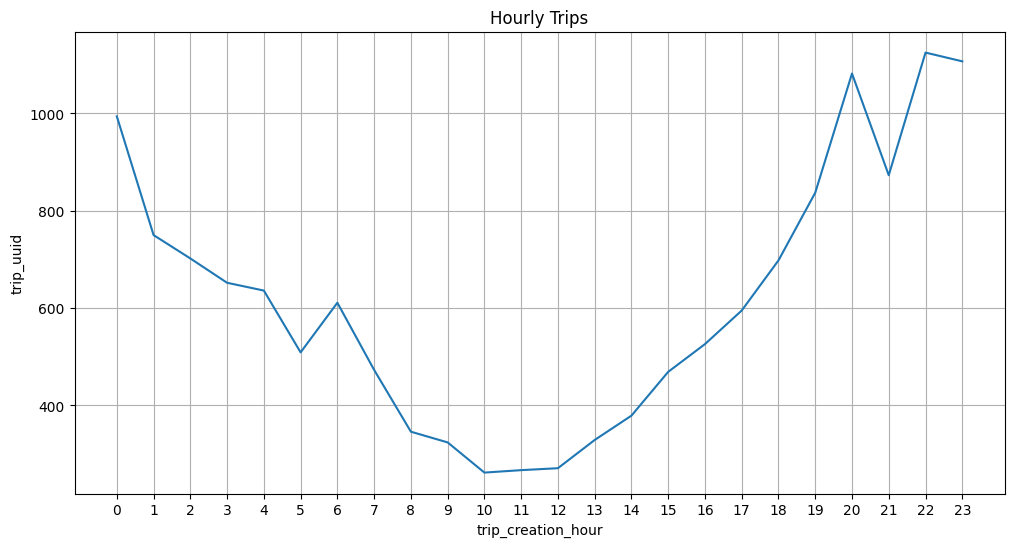

In [366]:
plt.figure(figsize = (12, 6))
sns.lineplot(data= hourly_trips,x=hourly_trips['trip_creation_hour'],y=hourly_trips['trip_uuid'])
plt.title('Hourly Trips')
plt.xticks(np.arange(0,24))
plt.grid('both')
plt.show()

**Insight**: Number of trips are getting started around 10A.M to night and again starts decreasing.

**Q. Let's find out how many trips are created for different days of month.**

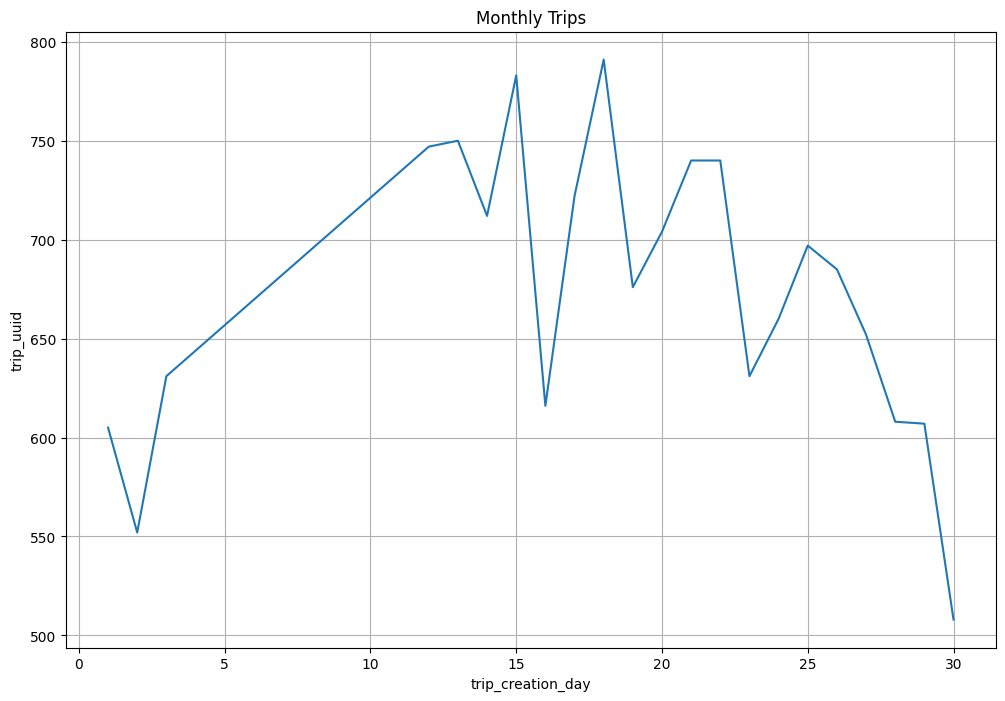

In [367]:
monthly_trips = df2.groupby('trip_creation_day')['trip_uuid'].count().reset_index()

plt.figure(figsize = (12,8))
sns.lineplot(data= monthly_trips , x=monthly_trips['trip_creation_day'], y=monthly_trips['trip_uuid'])
plt.title('Monthly Trips')
plt.grid('both')
plt.show()

**Insight:** Most of the trips are created at mid of the month,there is chance that customer make more orders during mid of the month.


**Q. Lets find out the how many trips created for different weeks**

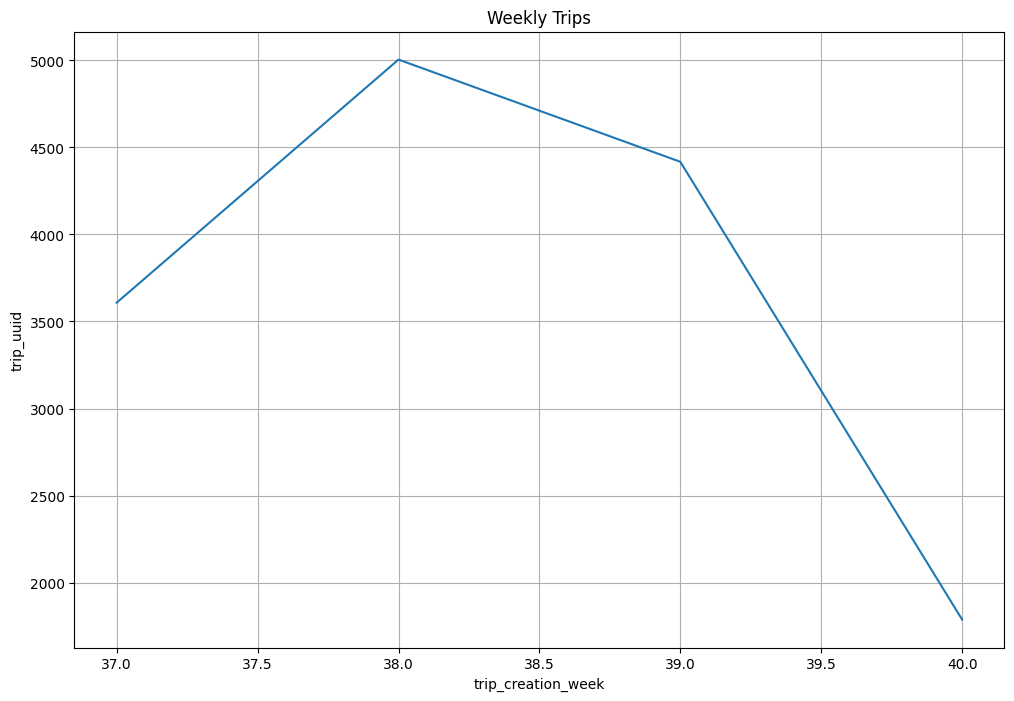

In [368]:
weekly_trips = df2.groupby('trip_creation_week')['trip_uuid'].count().reset_index()

plt.figure(figsize = (12,8))
sns.lineplot(data= weekly_trips , x=weekly_trips['trip_creation_week'], y=weekly_trips['trip_uuid'])
plt.title('Weekly Trips')
plt.grid('both')
plt.show()

**Insight**: In 38th week most of orders are being created.

**Q. How many trips are created over given two months time period**

In [369]:
monthly_trips = df2.groupby('trip_creation_month')['trip_uuid'].count().reset_index()
monthly_trips['Percentage'] = round(monthly_trips['trip_uuid']/df2.shape[0]*100,2)
monthly_trips

,trip_creation_month,trip_uuid,Percentage
0,9,13029,87.93
1,10,1788,12.07


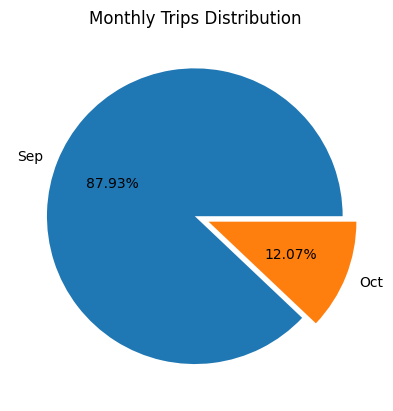

In [370]:
plt.pie(x = monthly_trips['trip_uuid'],
        labels = ['Sep', 'Oct'],
        explode = [0, 0.1],
       autopct = '%.2f%%')
plt.title("Monthly Trips Distribution")
plt.show()

**Q. Trip distribution for data**

In [371]:
df2_data = df2.groupby('data')['trip_uuid'].count().reset_index()
df2_data['perc'] = np.round(df2_data['trip_uuid'] * 100/ df2_data['trip_uuid'].sum(), 2)
df2_data.head()

,data,trip_uuid,perc
0,test,4163,28.1
1,training,10654,71.9


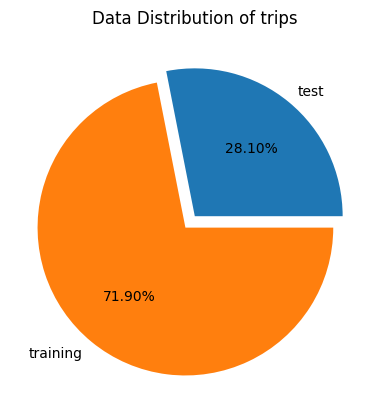

In [372]:
plt.pie(x = df2_data['trip_uuid'], labels=['test','training'], autopct='%.2f%%', explode=[0,0.1] )
plt.title("Data Distribution of trips")
plt.show()

**Q.Distribution of route types for the orders**

In [373]:
df_route = df2.groupby('route_type')['trip_uuid'].count().reset_index()
df_route['perc'] = np.round(df_route['trip_uuid'] * 100/ df_route['trip_uuid'].sum(), 2)
df_route.head()

,route_type,trip_uuid,perc
0,Carting,8908,60.12
1,FTL,5909,39.88


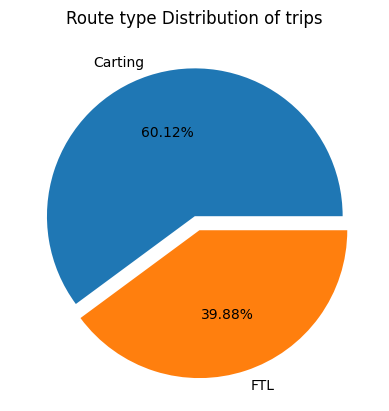

In [374]:
plt.pie(x = df_route['trip_uuid'], labels=['Carting','FTL'], autopct='%.2f%%', explode=[0,0.1] )
plt.title("Route type Distribution of trips")
plt.show()

**Q.Distribution of number of trips created form different states.**

In [375]:
df_source_state = df2.groupby(by = 'source_state')['trip_uuid'].count().to_frame().reset_index()
df_source_state['perc'] = np.round(df_source_state['trip_uuid'] * 100/ df_source_state['trip_uuid'].sum(), 2)
df_source_state = df_source_state.sort_values(by = 'trip_uuid', ascending = False)
df_source_state.head()

,source_state,trip_uuid,perc
17,Maharashtra,2714,18.32
14,Karnataka,2143,14.46
10,Haryana,1838,12.40
24,Tamil Nadu,1039,7.01
25,Telangana,781,5.27


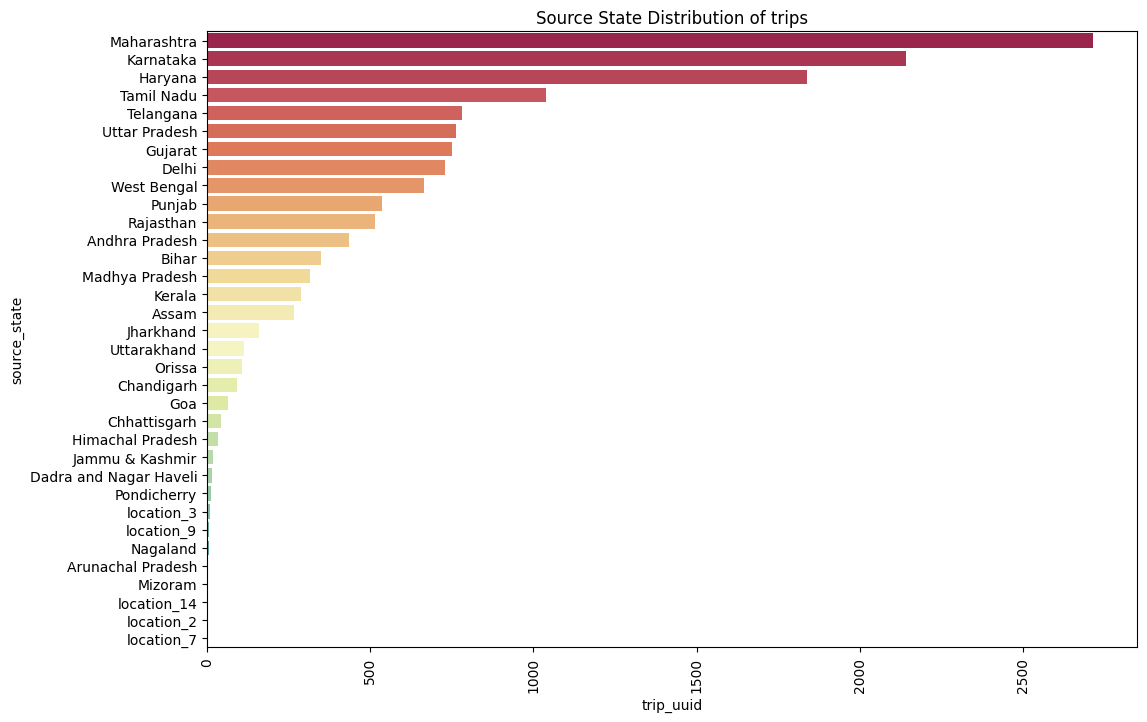

In [376]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_source_state , y=df_source_state['source_state'],x=df_source_state['trip_uuid'],palette="Spectral")
plt.title("Source State Distribution of trips")
plt.xticks(rotation=90)
plt.show()

**Insights**:

1. Sellers have strong base in Maharashtra, Karnataka, Haryana and Tamilnadu.

**Q. Lets check which cities have high trips**

In [377]:
citywise_trips = df2.groupby('source_city')['trip_uuid'].count().reset_index()
citywise_trips['Percenatage'] = round(citywise_trips['trip_uuid']/df2.shape[0]*100,2)
citywise_trips = citywise_trips.sort_values(by='Percenatage', ascending=False)[:20]
citywise_trips

,source_city,trip_uuid,Percenatage
439,Mumbai,1442,9.73
237,Gurgaon,1165,7.86
169,Delhi,883,5.96
79,Bengaluru,726,4.90
100,Bhiwandi,697,4.70
58,Bangalore,648,4.37
136,Chennai,568,3.83
264,Hyderabad,524,3.54
516,Pune,480,3.24
357,Kolkata,356,2.40


[]

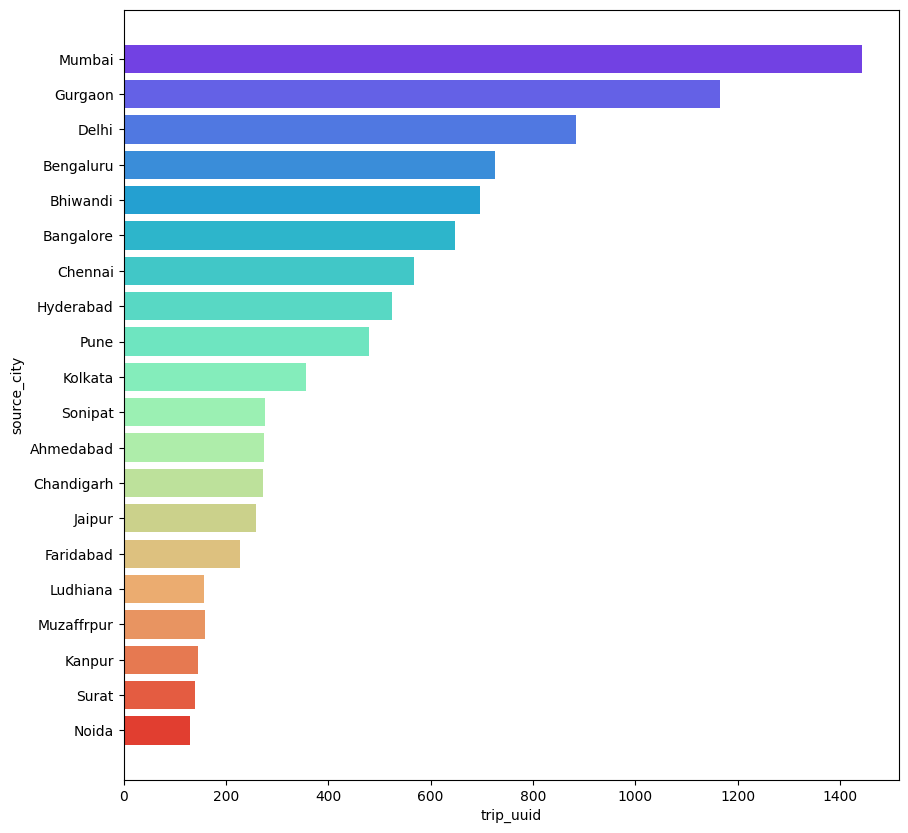

In [378]:
plt.figure(figsize = (10, 10))
sns.barplot(data = citywise_trips, x = citywise_trips['trip_uuid'], y = citywise_trips['source_city'],palette='rainbow')
plt.plot()

**Insights**:
It can be seen in the above plot that maximum trips originated from Mumbai city followed by Gurgaon Delhi, Bengaluru and Bhiwandi. That means that the seller base is strong in these cities.

**Q. Distribution of number of trips which ended in different states**

In [379]:
df_destination_state = df2.groupby(by = 'destination_state')['trip_uuid'].count().to_frame().reset_index()
df_destination_state['perc'] = np.round(df_destination_state['trip_uuid'] * 100/ df_destination_state['trip_uuid'].sum(), 2)
df_destination_state = df_destination_state.sort_values(by = 'trip_uuid', ascending = False)
df_destination_state.head()

,destination_state,trip_uuid,perc
18,Maharashtra,2561,17.28
15,Karnataka,2294,15.48
11,Haryana,1643,11.09
25,Tamil Nadu,1084,7.32
28,Uttar Pradesh,811,5.47


[]

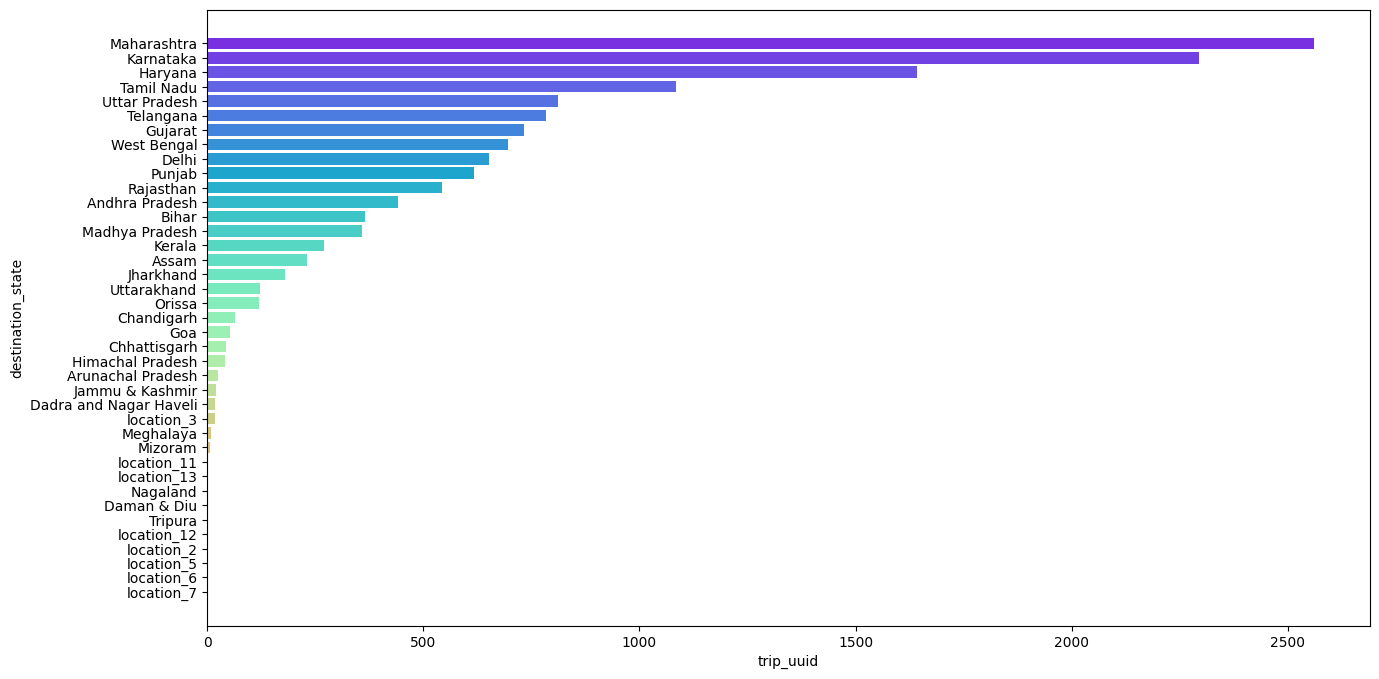

In [380]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df_destination_state, x = df_destination_state['trip_uuid'], y = df_destination_state['destination_state'],palette='rainbow')
plt.plot()

**Insights:**
It can be seen in the above plot that maximum trips ended in Maharashtra state followed by Karnataka, Haryana, Tamil Nadu and Uttar Pradesh. That means that the number of orders placed in these states is significantly high in these states.

**Q. top 30 cities based on the number of trips ended in different cities**

In [381]:
df_destination_city = df2.groupby(by = 'destination_city')['trip_uuid'].count().to_frame().reset_index()
df_destination_city['perc'] = np.round(df_destination_city['trip_uuid'] * 100/ df_destination_city['trip_uuid'].sum(), 2)
df_destination_city = df_destination_city.sort_values(by = 'trip_uuid', ascending = False)[:30]
df_destination_city

,destination_city,trip_uuid,perc
515,Mumbai,1548,10.45
96,Bengaluru,975,6.58
282,Gurgaon,936,6.32
200,Delhi,778,5.25
163,Chennai,595,4.02
72,Bangalore,551,3.72
308,Hyderabad,503,3.39
115,Bhiwandi,434,2.93
418,Kolkata,384,2.59
158,Chandigarh,339,2.29


[]

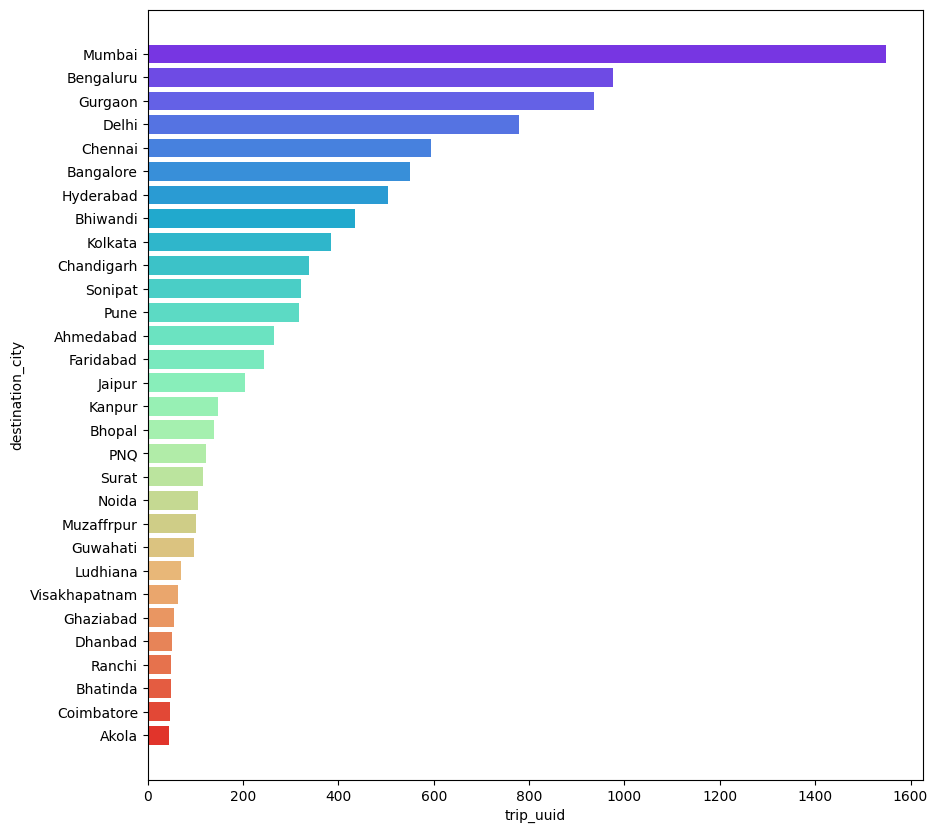

In [382]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df_destination_city, x = df_destination_city['trip_uuid'], y = df_destination_city['destination_city'],palette='rainbow')
plt.plot()

**Insight**:
It can be seen in the above plot that maximum trips ended in Mumbai city followed by Bengaluru, Gurgaon, Delhi and Chennai. That means that the number of orders placed in these cities is significantly high.

In [383]:
numerical_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination','actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time','segment_osrm_time', 'segment_osrm_distance']

In [384]:
df_corr = df2[numerical_columns].corr()
df_corr

,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
od_total_time,1.000000,0.999999,0.918222,0.961094,0.926516,0.924219,0.961119,0.918490,0.919199
start_scan_to_end_scan,0.999999,1.000000,0.918308,0.961147,0.926571,0.924299,0.961171,0.918561,0.919291
actual_distance_to_destination,0.918222,0.918308,1.000000,0.953757,0.993561,0.997264,0.952821,0.987538,0.993061
actual_time,0.961094,0.961147,0.953757,1.000000,0.958593,0.959214,0.999989,0.953872,0.956967
osrm_time,0.926516,0.926571,0.993561,0.958593,1.000000,0.997580,0.957765,0.993259,0.991608
osrm_distance,0.924219,0.924299,0.997264,0.959214,0.997580,1.000000,0.958353,0.991798,0.994710
segment_actual_time,0.961119,0.961171,0.952821,0.999989,0.957765,0.958353,1.000000,0.953039,0.956106
segment_osrm_time,0.918490,0.918561,0.987538,0.953872,0.993259,0.991798,0.953039,1.000000,0.996092
segment_osrm_distance,0.919199,0.919291,0.993061,0.956967,0.991608,0.994710,0.956106,0.996092,1.000000


**Insight:**
Very High Correlation (> 0.9) exists between columns all the numerical columns specified above

**Busiest corridor, avg distance between them, avg time taken**

In [385]:
df2['corridor'] = df2['source_name'] +' <---> '+ df2['destination_name']
df2['corridor'].value_counts()


,count
corridor,
Bangalore_Nelmngla_H (Karnataka) <---> Bengaluru_KGAirprt_HB (Karnataka),151
Gurgaon_Bilaspur_HB (Haryana) <---> Gurgaon_Bilaspur_HB (Haryana),124
Bengaluru_Bomsndra_HB (Karnataka) <---> Bengaluru_KGAirprt_HB (Karnataka),121
Bengaluru_KGAirprt_HB (Karnataka) <---> Bangalore_Nelmngla_H (Karnataka),108
Bhiwandi_Mankoli_HB (Maharashtra) <---> Mumbai Hub (Maharashtra),105
...,...
Karad_Mundhe_D (Maharashtra) <---> Kolhapur_Central_H_2 (Maharashtra),1
Bhiwani_DC (Haryana) <---> Loharu_BstndDPP_D (Haryana),1
Shadnagar_Central_D_1 (Telangana) <---> Shadnagar_Central_D_1 (Telangana),1


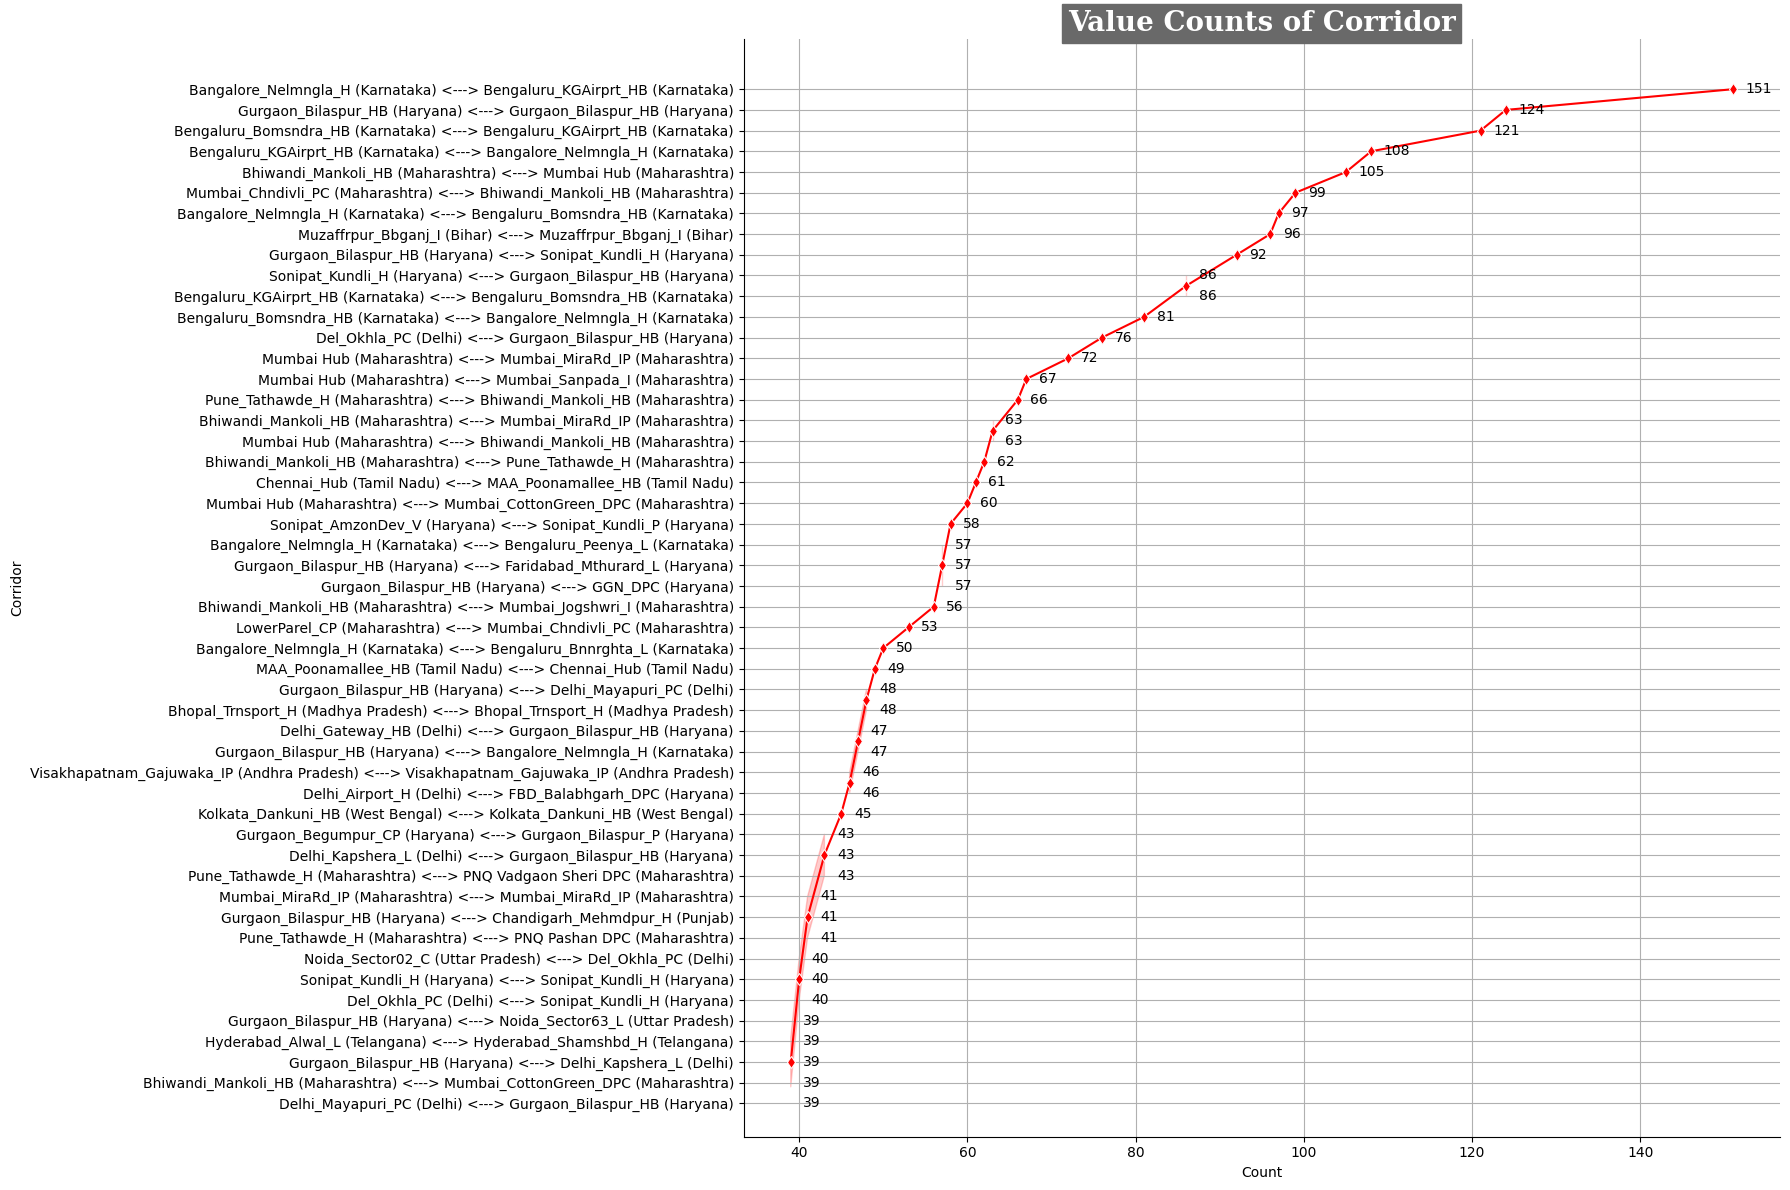

In [386]:
corridor_counts = df2['corridor'].value_counts()[:50]


plt.figure(figsize=(18,12))
#corridor_counts.plot(kind='line', marker='d', color='r')
sns.lineplot(y=corridor_counts.index, x=corridor_counts.values, marker='d', color='r')
plt.title('Value Counts of Corridor',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='dimgrey',color='w')
plt.ylabel('Corridor')
plt.xlabel('Count')
plt.tight_layout()
sns.despine()

plt.grid(True)

for i, count in enumerate(corridor_counts.values):
 plt.text(count+1.5, corridor_counts.index[i], str(count), ha='left', va='center')
plt.show()

**Insights**:

1.  The route between Bangalore_Nelamangala_H to Bengaluru_KGAirport_HB,Bengaluru_Bomsndra_HB sees the highest package volume, with 151 and 127 packages sent respectively.
2.  Bengaluru_Bommasandra_HB to Bengaluru_KGAirport_HB is also popular, with 121 packages sent.
3.  Bengaluru_KGAirport_HB to Bangalore_Nelamangala_H has moderate activity, with 108 packages sent


In [387]:

df2['state_corridor'] = df2['source_state']+'--'+df2['source_city'] +' <---> '+ df2['destination_state']+'--'+df2['destination_city']
df2['state_corridor'].value_counts()


,count
state_corridor,
Maharashtra--Mumbai <---> Maharashtra--Mumbai,675
Tamil Nadu--Chennai <---> Tamil Nadu--Chennai,529
Maharashtra--Bhiwandi <---> Maharashtra--Mumbai,437
Karnataka--Bangalore <---> Karnataka--Bengaluru,411
Telangana--Hyderabad <---> Telangana--Hyderabad,362
...,...
Tamil Nadu--Madurai <---> Tamil Nadu--Madurai,1
Telangana--Bengaluru <---> Telangana--Manthani,1
Rajasthan--Sikar <---> Rajasthan--Khetri,1


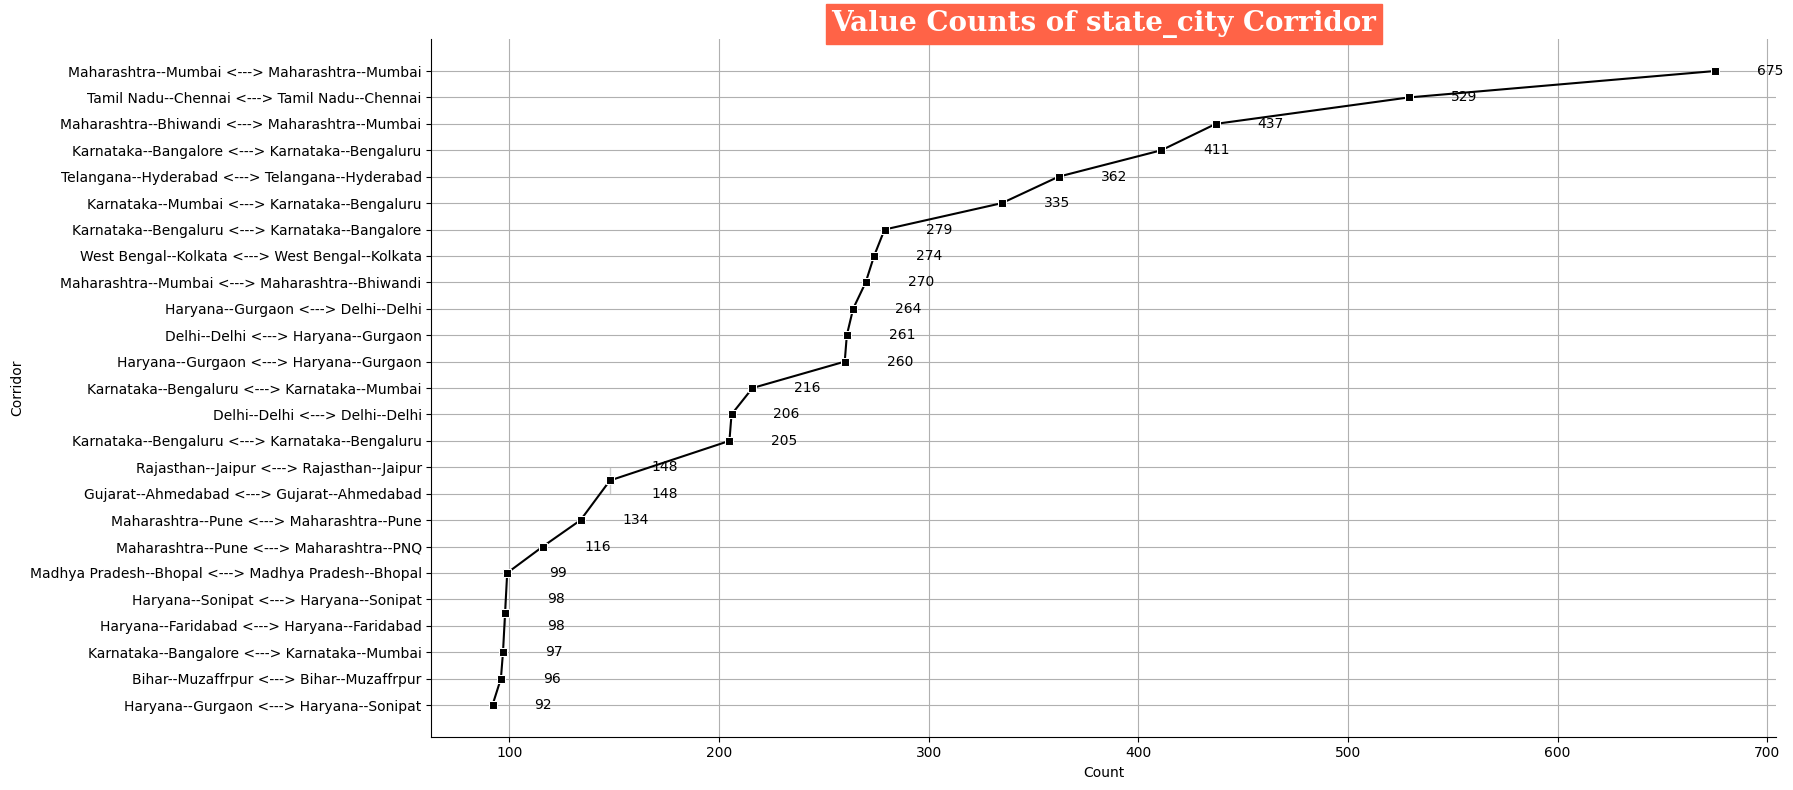

In [388]:
state_corridor_counts = df2['state_corridor'].value_counts()[:25]
plt.figure(figsize=(18,8))
sns.lineplot(y=state_corridor_counts.index, x=state_corridor_counts.values, marker='s', color='k')
plt.title('Value Counts of state_city Corridor',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='tomato',color='w')
plt.ylabel('Corridor')
plt.xlabel('Count')
plt.tight_layout()
sns.despine()
plt.grid(True)
for i, count in enumerate(state_corridor_counts.values):
 plt.text(count+20, state_corridor_counts.index[i], str(count), ha='left', va='center')
plt.show()

In [389]:
df2['city_corridor'] = df2['source_city']+'--'+df2['source_place'] +' <---> '+ df2['destination_city']+'--'+df2['destination_place']
display(df2['city_corridor'].value_counts())


,count
city_corridor,
Bangalore--Nelmngla_H <---> Bengaluru--KGAirprt_HB,151
Gurgaon--Bilaspur_HB <---> Gurgaon--Bilaspur_HB,124
Mumbai--Bomsndra_HB <---> Bengaluru--KGAirprt_HB,121
Bengaluru--KGAirprt_HB <---> Bangalore--Nelmngla_H,108
Bhiwandi--Mankoli_HB <---> Mumbai--unknown_place,105
...,...
Chennai--Porur_DPC <---> Chennai--Vepmpttu_DC,1
Bhadrachalam--ITDARd_D <---> Sathupally--VidyaNGR_D,1
Deoghar--Barmasia_D <---> Madhupur--Sitarmrd_D,1


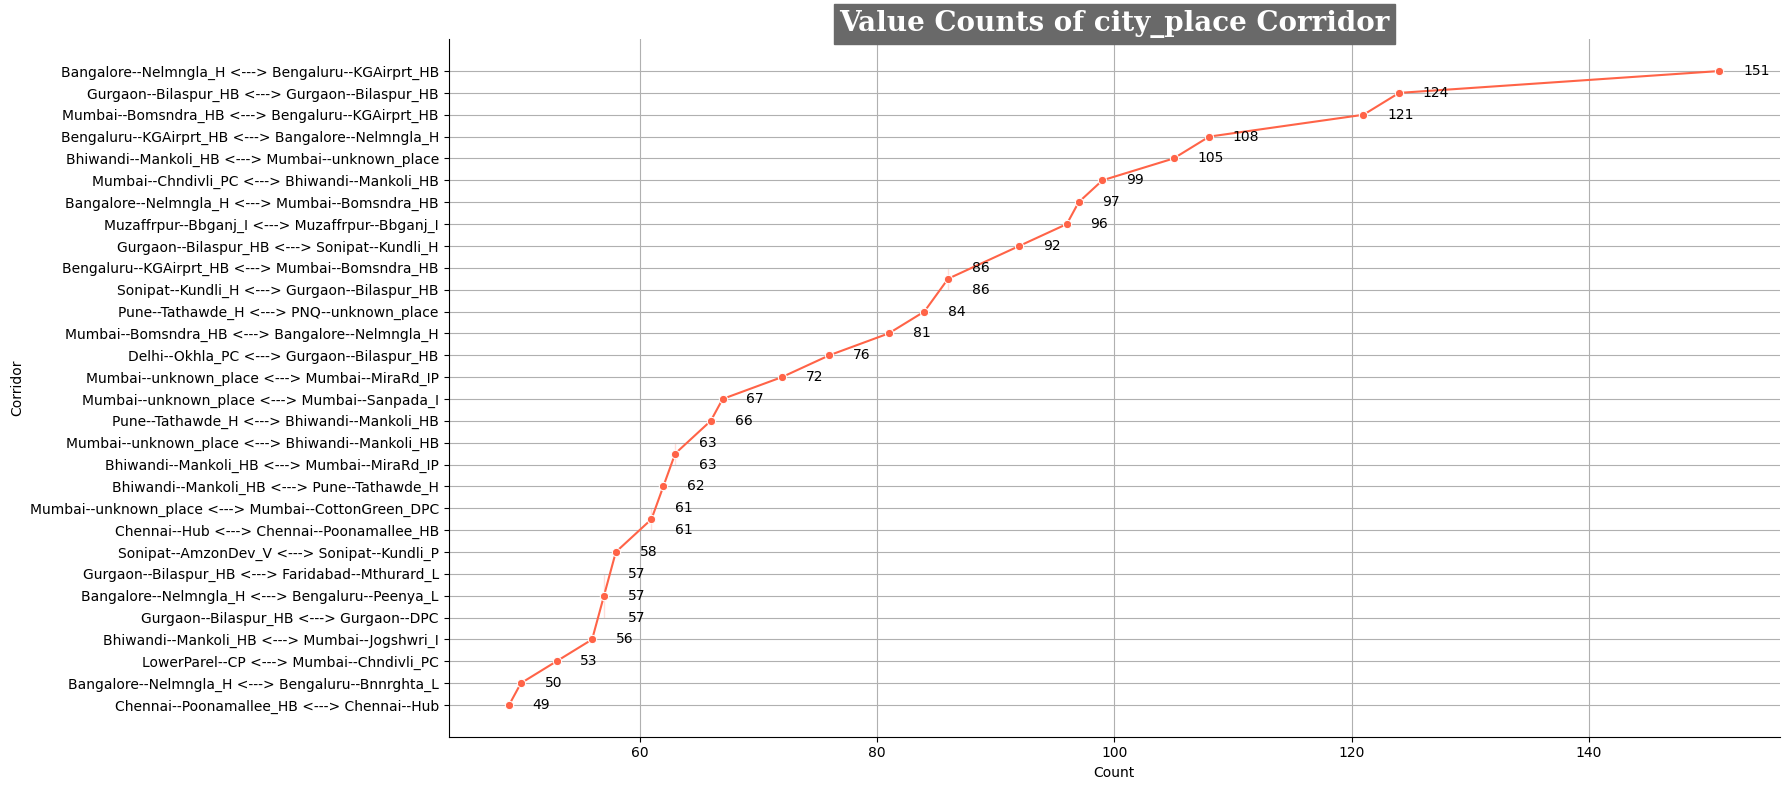

In [390]:
city_corridor_counts = df2['city_corridor'].value_counts()[:30]
plt.figure(figsize=(18,8))
sns.lineplot(y=city_corridor_counts.index, x=city_corridor_counts.values, marker='o', color='tomato')
plt.title('Value Counts of city_place Corridor',fontsize=20,fontfamily='serif',fontweight='bold',backgroundcolor='dimgray',color='w')
plt.ylabel('Corridor')
plt.xlabel('Count')
plt.tight_layout()
sns.despine()
plt.grid(True)
for i, count in enumerate(city_corridor_counts.values):
 plt.text(count+2, city_corridor_counts.index[i], str(count), ha='left', va='center')
plt.show()


**Insights:**

1.  Maharashtra, Karnataka, Haryana, and Tamil Nadu serve as key starting and ending locations for delivery services.
2.  Mumbai, Gurgaon, Delhi, and Bengaluru are major metropolitan centers from where many deliveries originate.
3.  A large proportion of nationwide deliveries are destined for Mumbai, Bengaluru, Gurgaon, and Delhi.


## **Outlier Detection & Treatment**

**Finding outliers in the numerical variables, and check it using visual analysis**

In [391]:
num_cols = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
df2[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
od_total_time,14817.0,531.697630,658.868223,23.460000,149.930000,280.770000,638.200000,7898.550000
start_scan_to_end_scan,14817.0,530.809998,658.707031,23.000000,149.000000,280.000000,637.000000,7898.000000
actual_distance_to_destination,14817.0,164.477829,305.388123,9.002461,22.837238,48.474072,164.583206,2186.531738
actual_time,14817.0,357.143768,561.395020,9.000000,67.000000,149.000000,370.000000,6265.000000
osrm_time,14817.0,161.384018,271.362549,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14817.0,204.344711,370.395508,9.072900,30.819201,65.618805,208.475006,2840.081055
segment_actual_time,14817.0,353.892273,556.246826,9.000000,66.000000,147.000000,367.000000,6230.000000
segment_osrm_time,14817.0,180.949783,314.541412,6.000000,31.000000,65.000000,185.000000,2564.000000
segment_osrm_distance,14817.0,223.201157,416.628326,9.072900,32.654499,70.154404,218.802399,3523.632324


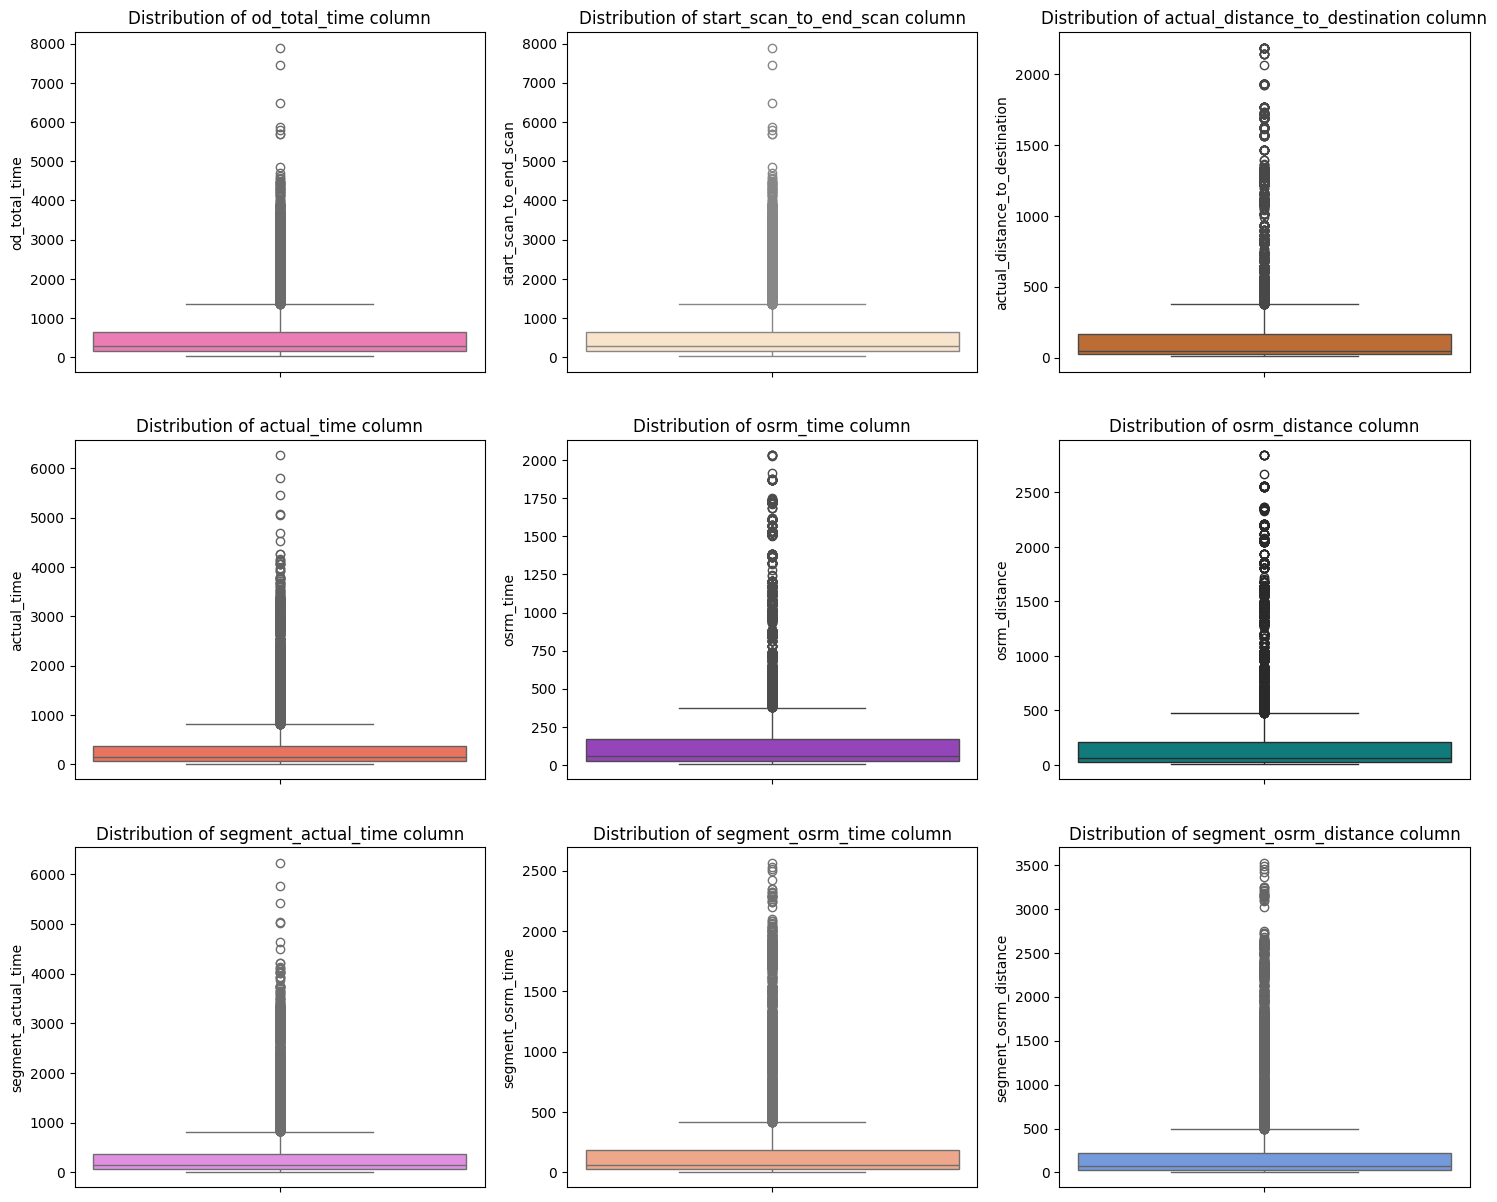

In [392]:
plt.figure(figsize = (18, 15))
for i in range(len(num_cols)):
    plt.subplot(3, 3, i + 1)
    clr = np.random.choice(list(mpl.colors.cnames))
    sns.boxplot(df2[num_cols[i]], color = clr)
    plt.title(f"Distribution of {num_cols[i]} column")
    plt.plot()

,od_total_time
0,2260.11
1,181.61
2,3934.36
3,100.49
4,718.34
...,...
14812,258.03
14813,60.59
14814,422.12
14815,348.52


Clipped data of od_total_time


,od_total_time
0,1370.605
1,181.610
2,1370.605
3,100.490
4,718.340
...,...
14812,258.030
14813,60.590
14814,422.120
14815,348.520



Filtered data of od_total_time


,od_total_time
0,2260.11
1,181.61
2,3934.36
3,100.49
4,718.34
...,...
14812,258.03
14813,60.59
14814,422.12
14815,348.52


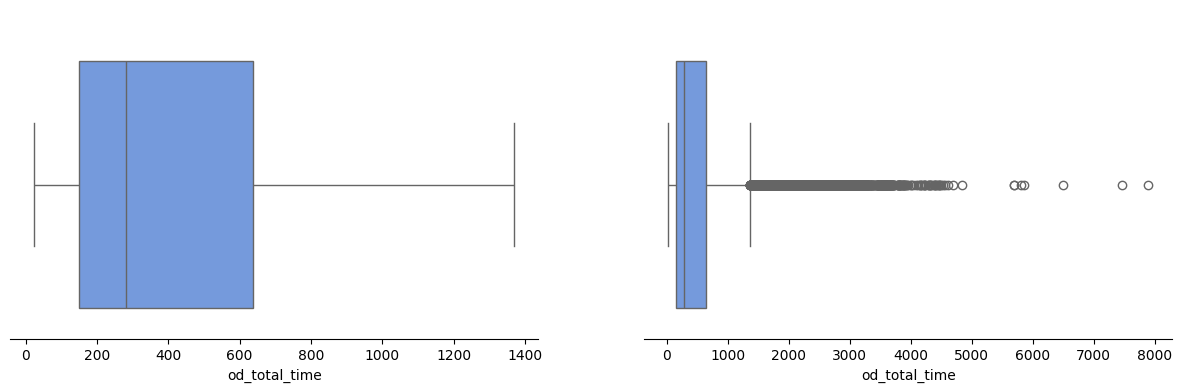

,start_scan_to_end_scan
0,2259.0
1,180.0
2,3933.0
3,100.0
4,717.0
...,...
14812,257.0
14813,60.0
14814,421.0
14815,347.0


Clipped data of start_scan_to_end_scan


,start_scan_to_end_scan
0,1369.0
1,180.0
2,1369.0
3,100.0
4,717.0
...,...
14812,257.0
14813,60.0
14814,421.0
14815,347.0



Filtered data of start_scan_to_end_scan


,start_scan_to_end_scan
0,2259.0
1,180.0
2,3933.0
3,100.0
4,717.0
...,...
14812,257.0
14813,60.0
14814,421.0
14815,347.0


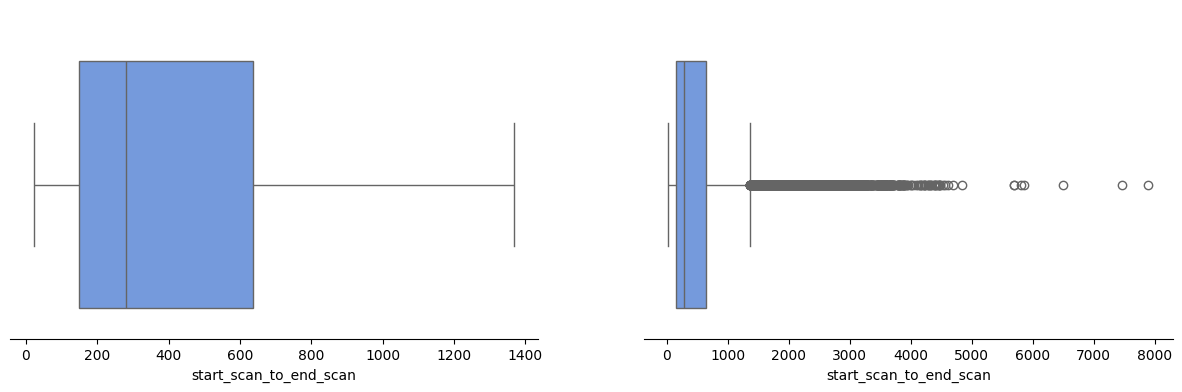

,actual_distance_to_destination
0,824.732849
1,73.186905
2,1927.404297
3,17.175274
4,127.448502
...,...
14812,57.762333
14813,15.513784
14814,38.684837
14815,134.723831


Clipped data of actual_distance_to_destination


,actual_distance_to_destination
0,377.202148
1,73.186905
2,377.202148
3,17.175274
4,127.448502
...,...
14812,57.762333
14813,15.513784
14814,38.684837
14815,134.723831



Filtered data of actual_distance_to_destination


,actual_distance_to_destination
0,824.732849
1,73.186905
2,1927.404297
3,17.175274
4,127.448502
...,...
14812,57.762333
14813,15.513784
14814,38.684837
14815,134.723831


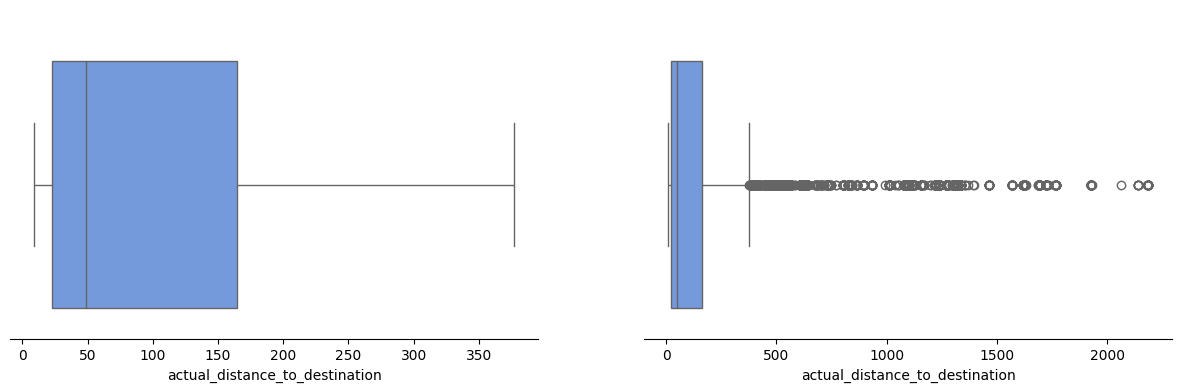

,actual_time
0,1562.0
1,143.0
2,3347.0
3,59.0
4,341.0
...,...
14812,83.0
14813,21.0
14814,282.0
14815,264.0


Clipped data of actual_time


,actual_time
0,824.5
1,143.0
2,824.5
3,59.0
4,341.0
...,...
14812,83.0
14813,21.0
14814,282.0
14815,264.0



Filtered data of actual_time


,actual_time
0,1562.0
1,143.0
2,3347.0
3,59.0
4,341.0
...,...
14812,83.0
14813,21.0
14814,282.0
14815,264.0


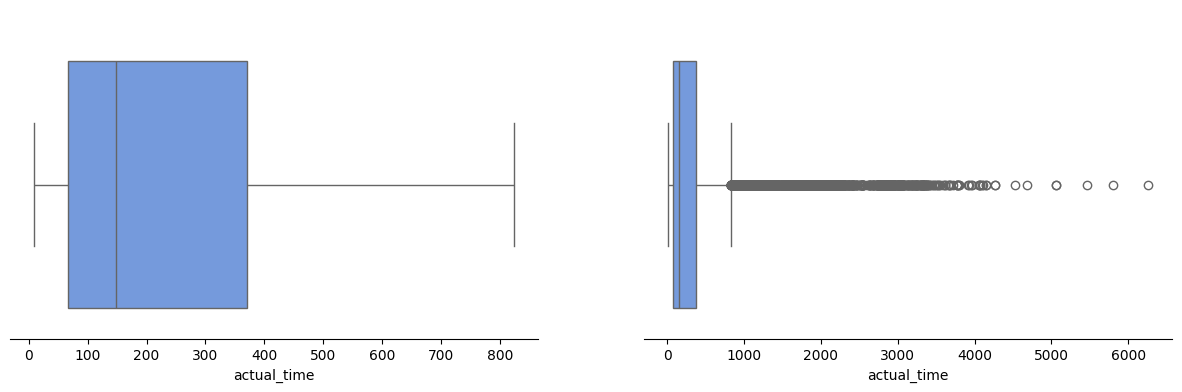

,osrm_time
0,717.0
1,68.0
2,1740.0
3,15.0
4,117.0
...,...
14812,62.0
14813,12.0
14814,48.0
14815,179.0


Clipped data of osrm_time


,osrm_time
0,376.5
1,68.0
2,376.5
3,15.0
4,117.0
...,...
14812,62.0
14813,12.0
14814,48.0
14815,179.0



Filtered data of osrm_time


,osrm_time
0,717.0
1,68.0
2,1740.0
3,15.0
4,117.0
...,...
14812,62.0
14813,12.0
14814,48.0
14815,179.0


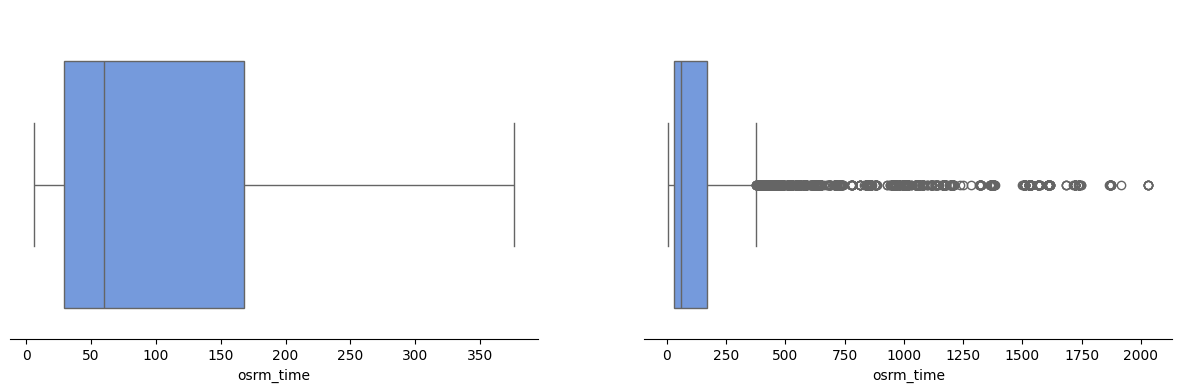

,osrm_distance
0,991.352295
1,85.111000
2,2354.066650
3,19.680000
4,146.791794
...,...
14812,73.462997
14813,16.088200
14814,58.903702
14815,171.110306


Clipped data of osrm_distance


,osrm_distance
0,474.958710
1,85.111000
2,474.958710
3,19.680000
4,146.791794
...,...
14812,73.462997
14813,16.088200
14814,58.903702
14815,171.110306



Filtered data of osrm_distance


,osrm_distance
0,991.352295
1,85.111000
2,2354.066650
3,19.680000
4,146.791794
...,...
14812,73.462997
14813,16.088200
14814,58.903702
14815,171.110306


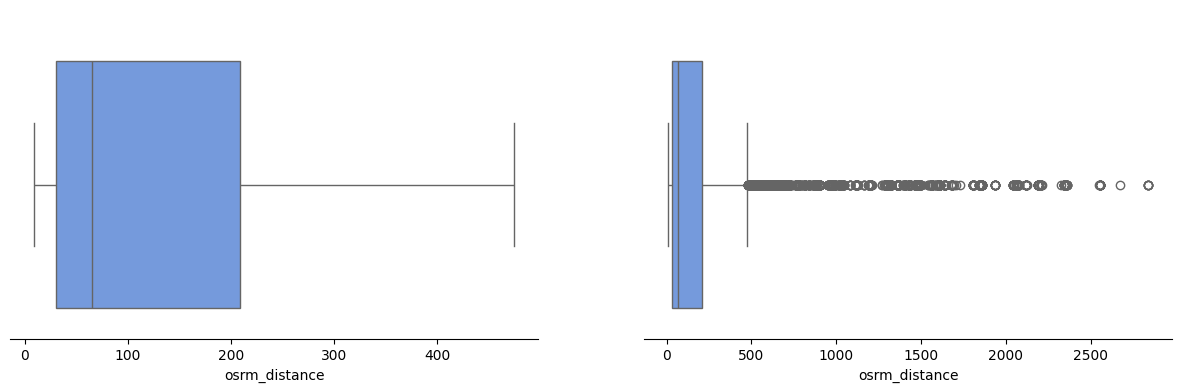

,segment_actual_time
0,1548.0
1,141.0
2,3308.0
3,59.0
4,340.0
...,...
14812,82.0
14813,21.0
14814,281.0
14815,258.0


Clipped data of segment_actual_time


,segment_actual_time
0,818.5
1,141.0
2,818.5
3,59.0
4,340.0
...,...
14812,82.0
14813,21.0
14814,281.0
14815,258.0



Filtered data of segment_actual_time


,segment_actual_time
0,1548.0
1,141.0
2,3308.0
3,59.0
4,340.0
...,...
14812,82.0
14813,21.0
14814,281.0
14815,258.0


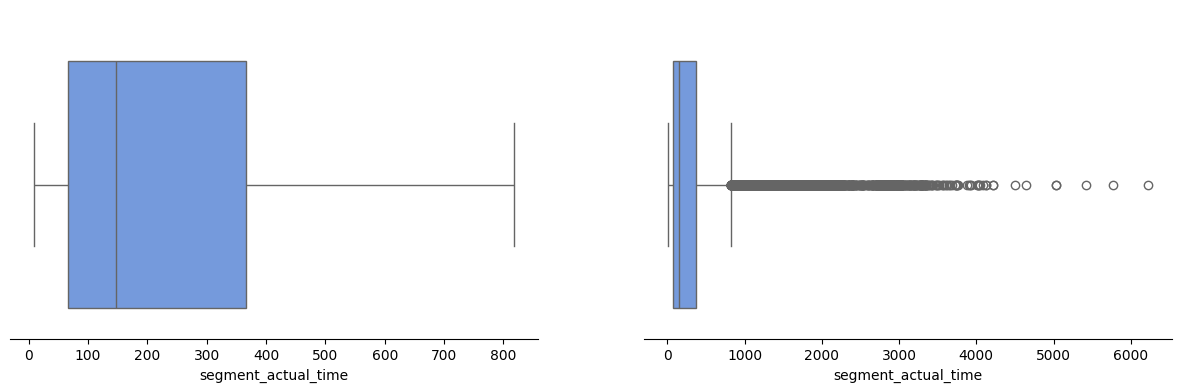

,segment_osrm_time
0,1008.0
1,65.0
2,1941.0
3,16.0
4,115.0
...,...
14812,62.0
14813,11.0
14814,88.0
14815,221.0


Clipped data of segment_osrm_time


,segment_osrm_time
0,416.0
1,65.0
2,416.0
3,16.0
4,115.0
...,...
14812,62.0
14813,11.0
14814,88.0
14815,221.0



Filtered data of segment_osrm_time


,segment_osrm_time
0,1008.0
1,65.0
2,1941.0
3,16.0
4,115.0
...,...
14812,62.0
14813,11.0
14814,88.0
14815,221.0


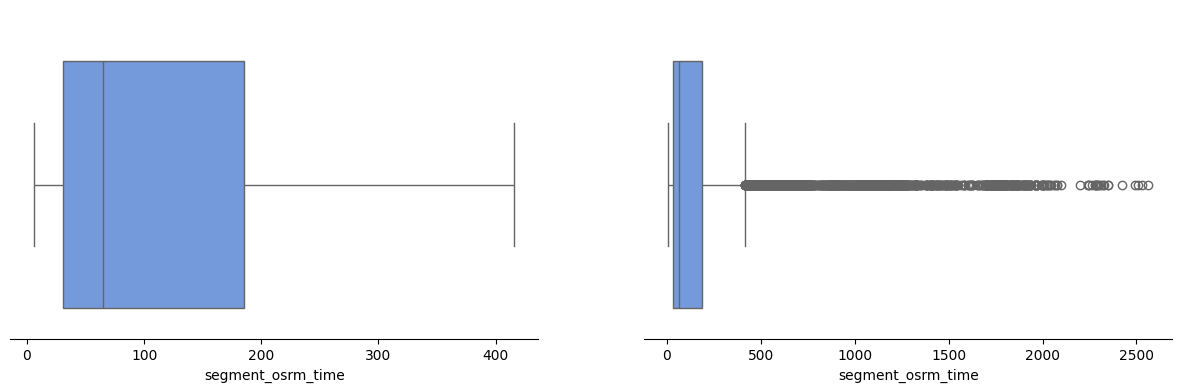

,segment_osrm_distance
0,1320.473267
1,84.189400
2,2545.267822
3,19.876600
4,146.791901
...,...
14812,64.855103
14813,16.088299
14814,104.886597
14815,223.532394


Clipped data of segment_osrm_distance


,segment_osrm_distance
0,498.024261
1,84.189400
2,498.024261
3,19.876600
4,146.791901
...,...
14812,64.855103
14813,16.088299
14814,104.886597
14815,223.532394



Filtered data of segment_osrm_distance


,segment_osrm_distance
0,1320.473267
1,84.189400
2,2545.267822
3,19.876600
4,146.791901
...,...
14812,64.855103
14813,16.088299
14814,104.886597
14815,223.532394


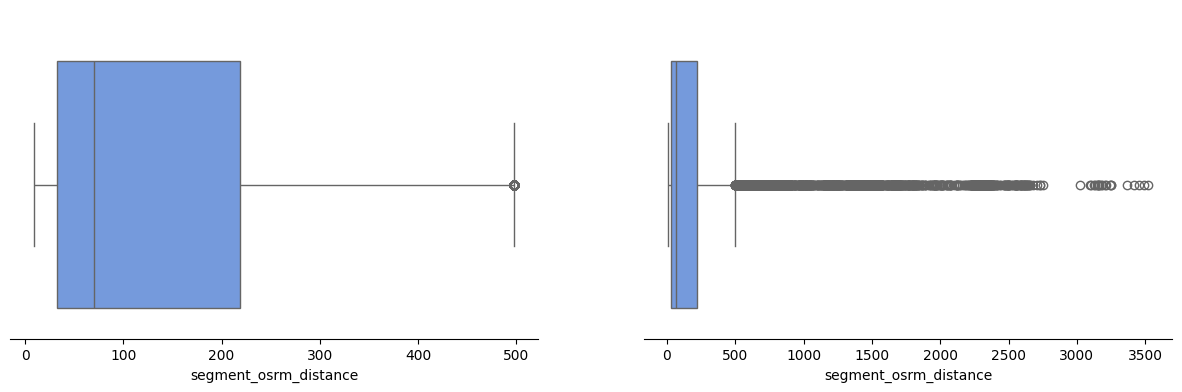

In [393]:
for i, col in enumerate(num_cols):

 data = df2[col]
 display(data.to_frame())


 Q1 = np.percentile(data, 25)
 Q3 = np.percentile(data, 75)
 IQR = Q3 - Q1

 lower_bound = Q1 - (1.5 * IQR)
 upper_bound = Q3 + (1.5 * IQR)

 clipped_data = np.clip(data, lower_bound, upper_bound)
 print(f'Clipped data of {col}')
 display(clipped_data.to_frame())
 print()

 # Plot boxplot of the clipped data
 plt.figure(figsize=(15, 4))
 plt.subplot(121)
 sns.boxplot(x=clipped_data, color=clr)
 sns.despine(left=True)
 plt.yticks([])
 plt.title(f'Boxplot of clipped {col}', fontfamily='serif', fontweight='bold', fontsize=12, color='w')

 filtered_data = data.loc[(data >= lower_bound) | (data <= upper_bound)]
 print(f'Filtered data of {col}')
 display(filtered_data.to_frame())
 print()

 plt.subplot(122)
 sns.boxplot(x=filtered_data, color=clr)
 sns.despine(left=True)
 plt.yticks([])
 plt.title(f'Boxplot of filtered {col}', fontfamily='serif', fontweight='bold', fontsize=12, color='w')

 plt.show()

In [394]:
num_df = df2[num_cols]
num_df

,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,2260.11,2259.0,824.732849,1562.0,717.0,991.352295,1548.0,1008.0,1320.473267
1,181.61,180.0,73.186905,143.0,68.0,85.111000,141.0,65.0,84.189400
2,3934.36,3933.0,1927.404297,3347.0,1740.0,2354.066650,3308.0,1941.0,2545.267822
3,100.49,100.0,17.175274,59.0,15.0,19.680000,59.0,16.0,19.876600
4,718.34,717.0,127.448502,341.0,117.0,146.791794,340.0,115.0,146.791901
...,...,...,...,...,...,...,...,...,...
14812,258.03,257.0,57.762333,83.0,62.0,73.462997,82.0,62.0,64.855103
14813,60.59,60.0,15.513784,21.0,12.0,16.088200,21.0,11.0,16.088299
14814,422.12,421.0,38.684837,282.0,48.0,58.903702,281.0,88.0,104.886597
14815,348.52,347.0,134.723831,264.0,179.0,171.110306,258.0,221.0,223.532394


In [395]:
num_cols

['od_total_time',
 'start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance']

In [396]:

Q1 = np.percentile(num_df[num_cols], 25)
Q3 = np.percentile(num_df[num_cols], 75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
clipped_num_df = np.clip(num_df[num_cols], lower_bound, upper_bound)
display(clipped_num_df)
filtered_num_df = num_df[num_cols][(num_df[num_cols] >= lower_bound) | (num_df[num_cols] <= upper_bound)]
display(filtered_num_df)

,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,691.990952,691.990952,691.990952,691.990952,691.990952,691.990952,691.990952,691.990952,691.990952
1,181.610000,180.000000,73.186905,143.000000,68.000000,85.111000,141.000000,65.000000,84.189400
2,691.990952,691.990952,691.990952,691.990952,691.990952,691.990952,691.990952,691.990952,691.990952
3,100.490000,100.000000,17.175274,59.000000,15.000000,19.680000,59.000000,16.000000,19.876600
4,691.990952,691.990952,127.448502,341.000000,117.000000,146.791794,340.000000,115.000000,146.791901
...,...,...,...,...,...,...,...,...,...
14812,258.030000,257.000000,57.762333,83.000000,62.000000,73.462997,82.000000,62.000000,64.855103
14813,60.590000,60.000000,15.513784,21.000000,12.000000,16.088200,21.000000,11.000000,16.088299
14814,422.120000,421.000000,38.684837,282.000000,48.000000,58.903702,281.000000,88.000000,104.886597
14815,348.520000,347.000000,134.723831,264.000000,179.000000,171.110306,258.000000,221.000000,223.532394


,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,2260.11,2259.0,824.732849,1562.0,717.0,991.352295,1548.0,1008.0,1320.473267
1,181.61,180.0,73.186905,143.0,68.0,85.111000,141.0,65.0,84.189400
2,3934.36,3933.0,1927.404297,3347.0,1740.0,2354.066650,3308.0,1941.0,2545.267822
3,100.49,100.0,17.175274,59.0,15.0,19.680000,59.0,16.0,19.876600
4,718.34,717.0,127.448502,341.0,117.0,146.791794,340.0,115.0,146.791901
...,...,...,...,...,...,...,...,...,...
14812,258.03,257.0,57.762333,83.0,62.0,73.462997,82.0,62.0,64.855103
14813,60.59,60.0,15.513784,21.0,12.0,16.088200,21.0,11.0,16.088299
14814,422.12,421.0,38.684837,282.0,48.0,58.903702,281.0,88.0,104.886597
14815,348.52,347.0,134.723831,264.0,179.0,171.110306,258.0,221.0,223.532394


## **In-depth analysis and feature engineering**

**Compare the difference between od_total_time and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.**

_______________________________________________________________________________

**STEP-1** : Set up Null Hypothesis

**Null Hypothesis ( H0 )** - od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are same.

**Alternate Hypothesis ( Ha )** - od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are different.
_____________________________________________________________________________

**STEP-2** : Checking for basic assumpitons for the hypothesis

*  Distribution check using **QQ Plot**
*  Homogeneity of Variances using **Lavene's test**
____________________________________________________________________________

**STEP-3**: Define Test statistics; Distribution of T under H0.

If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.
_____________________________________________________________________________

**STEP-4**: Compute the p-value and fix value of alpha.

*  We set our alpha to be 0.05
_______________________________________________________________________________

**STEP-5**: Compare p-value and alpha.

   Based on p-value, we will accept or reject H0.

*  p-val > alpha : Accept H0
*  p-val < alpha : Reject H0


In [397]:
clipped_num_df[['od_total_time', 'start_scan_to_end_scan']].describe()

,od_total_time,start_scan_to_end_scan
count,14817.000000,14817.000000
mean,354.232826,353.645472
std,231.808000,231.931918
min,23.460000,23.000000
25%,149.930000,149.000000
50%,280.770000,280.000000
75%,638.200000,637.000000
max,691.990952,691.990952


**Insight:**
Visual Tests to know if the samples follow normal distribution

[]

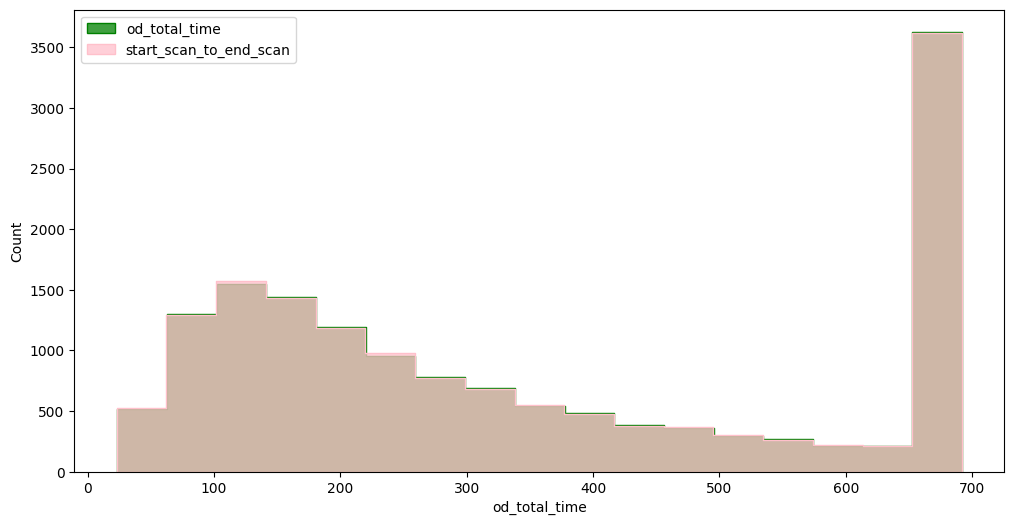

In [398]:
plt.figure(figsize = (12, 6))
sns.histplot(clipped_num_df['od_total_time'], element = 'step', color = 'green')
sns.histplot(clipped_num_df['start_scan_to_end_scan'], element = 'step', color = 'pink')
plt.legend(['od_total_time', 'start_scan_to_end_scan'])
plt.plot()

**Distribution check using QQ Plot**

[]

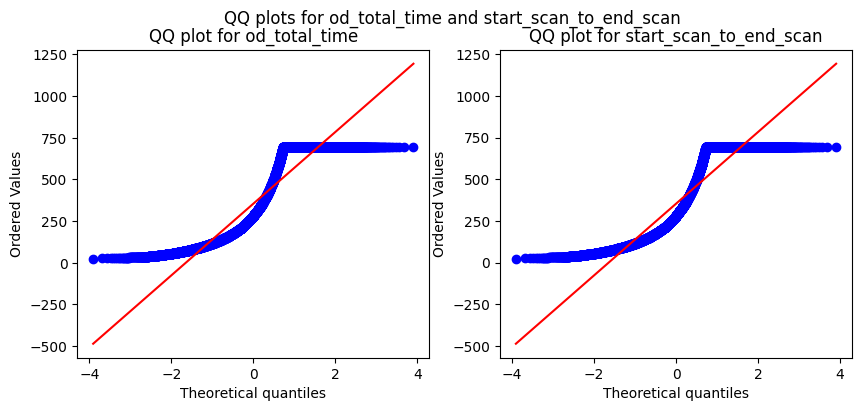

In [399]:
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for od_total_time and start_scan_to_end_scan')
spy.probplot(clipped_num_df['od_total_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for od_total_time')
plt.subplot(1, 2, 2)
spy.probplot(clipped_num_df['start_scan_to_end_scan'], plot = plt, dist = 'norm')
plt.title('QQ plot for start_scan_to_end_scan')
plt.plot()

**Insight**: from the above plots that the samples do not come from normal distribution.

In [400]:
df_clipped = clipped_num_df.copy()

In [401]:
df_clipped['difference'] = df_clipped['od_total_time'] - df_clipped['start_scan_to_end_scan']

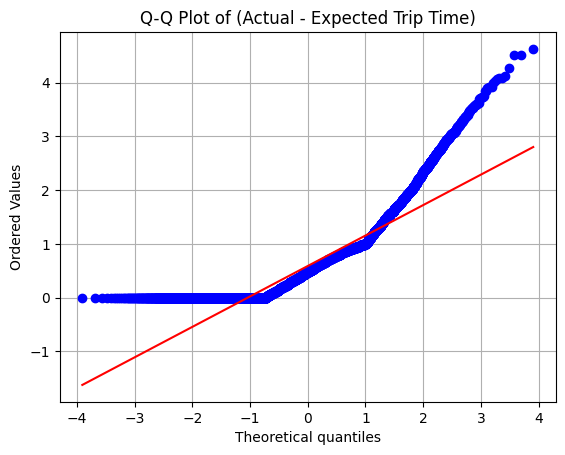

In [402]:
spy.probplot(df_clipped['difference'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of (Actual - Expected Trip Time)')
plt.grid()
plt.show()

**Insight**:
QQ-Plot concludes that data is not normal.


Lets Perform Shapiro-Wilk Test for normality.

In [403]:
test_stat, p_value = spy.shapiro(df_clipped['od_total_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.3419821706632396e-55
The sample does not follow normal distribution


In [404]:
test_stat, p_value = spy.shapiro(df_clipped['start_scan_to_end_scan'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.8162044703153615e-55
The sample does not follow normal distribution


**Insight**: Shapiro Wilk alos concludes Data is not Normally Distrubuted.

Lets try to use Log Normal or Box Cox Transformations:


In [405]:
skewness = df_clipped[numerical_columns].skew()  # For numerical columns in df
print("Skewness:\n", skewness)

Skewness:
 od_total_time                     0.397086
start_scan_to_end_scan            0.399477
actual_distance_to_destination    2.088891
actual_time                       0.973901
osrm_time                         2.050116
osrm_distance                     1.759630
segment_actual_time               0.983961
segment_osrm_time                 1.914626
segment_osrm_distance             1.682813
dtype: float64


**Insights**:

1. Most of Data is heavily Right Skewed, we are good to use Log Normal .

In [406]:
all_positive = (df_clipped[numerical_columns] > 0).all().all()  # Returns True if all values are positive, False otherwise
print("All values are positive:", all_positive)

All values are positive: True


**Insight**:
 All values are positive can use Box-Cox Transformation also


In [407]:
log_data =  np.log(df_clipped[['od_total_time','start_scan_to_end_scan']])

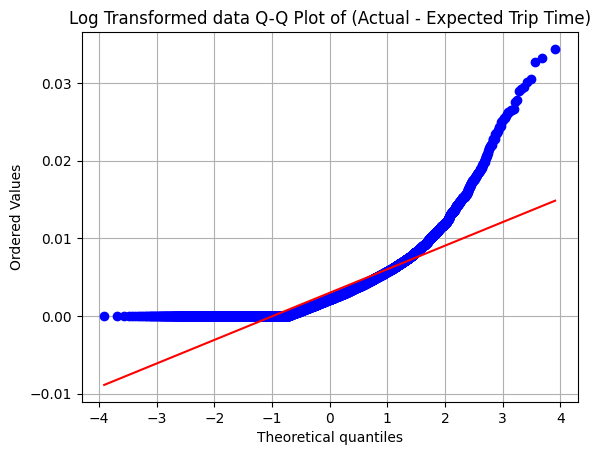

In [408]:
log_data['difference'] = log_data['od_total_time'] - log_data['start_scan_to_end_scan']

spy.probplot(log_data['difference'].dropna(), dist="norm", plot=plt)
plt.title('Log Transformed data Q-Q Plot of (Actual - Expected Trip Time)')
plt.grid()
plt.show()

Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [409]:
transformed_od_total_time = spy.boxcox(df_clipped['od_total_time'])[0]
test_stat, p_value = spy.shapiro(transformed_od_total_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 9.484491345715386e-66
The sample does not follow normal distribution


In [410]:
transformed_start_scan_to_end_scan = spy.boxcox(df_clipped['start_scan_to_end_scan'])[0]
test_stat, p_value = spy.shapiro(transformed_start_scan_to_end_scan)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.117654540600476e-65
The sample does not follow normal distribution


**Insight**:
 Even after applying the boxcox transformation  and Log Normal Transformation on each of the "od_total_time" and "start_scan_to_end_scan" columns, the distributions do not follow normal distribution.

Homogeneity of Variances using Lavene's test

In [411]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df_clipped['od_total_time'], df_clipped['start_scan_to_end_scan'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.9938910188261746
The samples have Homogenous Variance 


**Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.**

In [412]:
test_stat, p_value = spy.mannwhitneyu(df_clipped['od_total_time'], df_clipped['start_scan_to_end_scan'])
print('P-value :',p_value)

P-value : 0.7909505580544021


Since p-value > alpha therfore it can be concluded that od_total_time and start_scan_to_end_scan are similar.

**Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [413]:
df_clipped[['actual_time', 'segment_actual_time']].describe()

,actual_time,segment_actual_time
count,14817.000000,14817.000000
mean,247.563121,246.093873
std,227.586605,227.355223
min,9.000000,9.000000
25%,67.000000,66.000000
50%,149.000000,147.000000
75%,370.000000,367.000000
max,691.990952,691.990952


Visual Tests to know if the samples follow normal distribution

[]

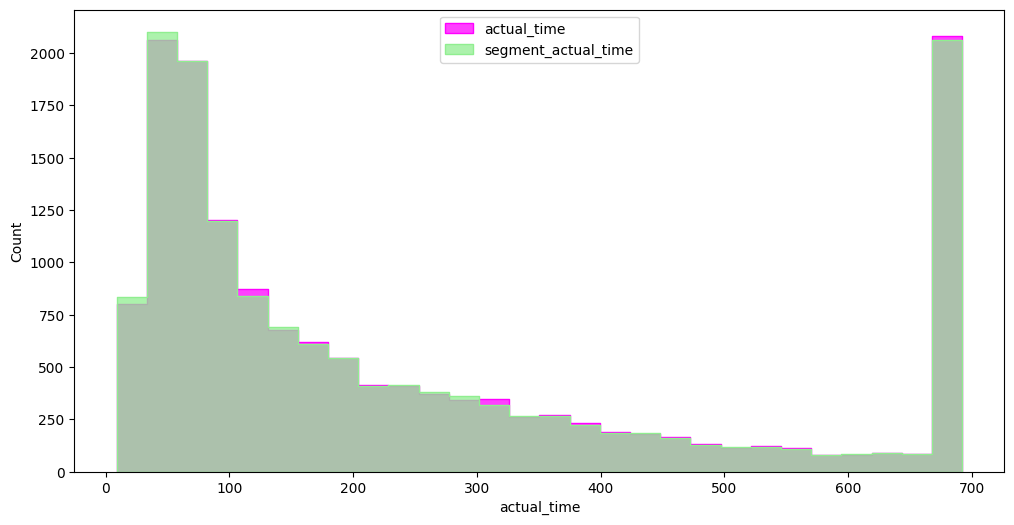

In [414]:
plt.figure(figsize = (12, 6))
sns.histplot(df_clipped['actual_time'], element = 'step', color = 'magenta')
sns.histplot(df_clipped['segment_actual_time'], element = 'step', color = 'lightgreen')
plt.legend(['actual_time', 'segment_actual_time'])
plt.plot()

Distribution check using QQ Plot

[]

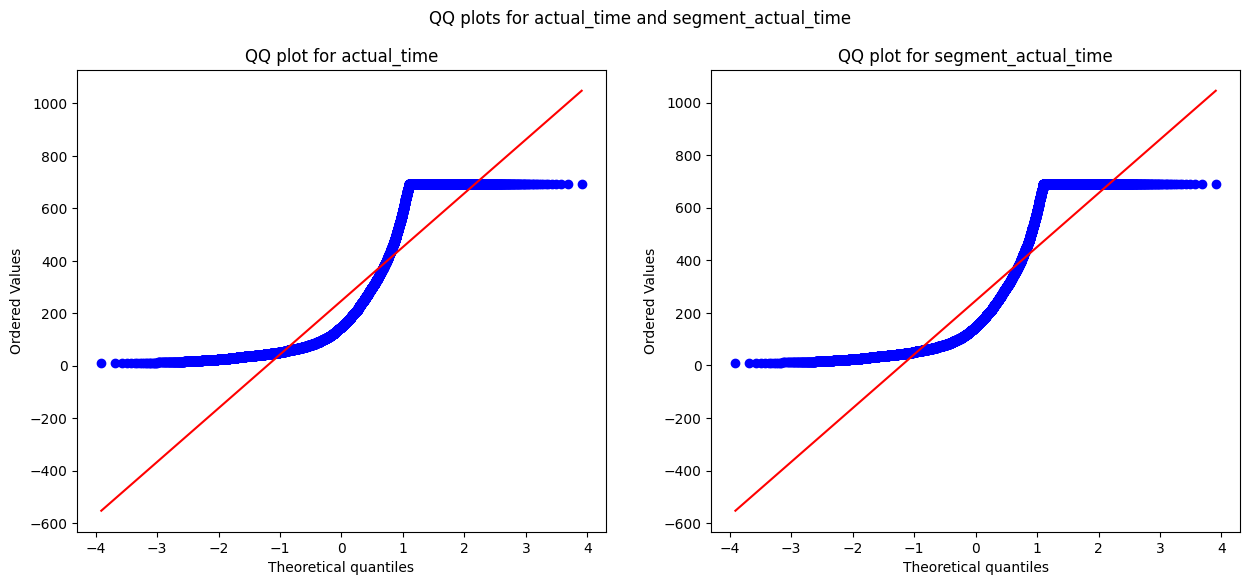

In [415]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and segment_actual_time')
spy.probplot(df_clipped['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
spy.probplot(df_clipped['segment_actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_actual_time')
plt.plot()

**Insight:**

from the above plots that the samples do not come from normal distribution.

**Applying Shapiro-Wilk test for normality**

 H0 : The sample follows normal distribution
 Ha : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [416]:
test_stat, p_value = spy.shapiro(df_clipped['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.8758397250790774e-61
The sample does not follow normal distribution


In [417]:
test_stat, p_value = spy.shapiro(df_clipped['segment_actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.5865374416394726e-60
The sample does not follow normal distribution


Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [418]:
transformed_actual_time = spy.boxcox(df_clipped['actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.465938752250912e-56
The sample does not follow normal distribution


In [419]:
transformed_segment_actual_time = spy.boxcox(df_clipped['segment_actual_time'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_actual_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 9.520331428691678e-56
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the "actual_time" and "segment_actual_time" columns, the distributions do not follow normal distribution.


**Homogeneity of Variances using Lavene's test**

In [420]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df_clipped['actual_time'], df_clipped['segment_actual_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.7682211083093626
The samples have Homogenous Variance 


Since the samples do not come from normal distribution T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [421]:
test_stat, p_value = spy.mannwhitneyu(df_clipped['actual_time'], df_clipped['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.42108476986607957
The samples are similar 


Since p-value > alpha therfore it can be concluded that actual_time and segment_actual_time are similar.

**Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [422]:
df_clipped[['osrm_distance', 'segment_osrm_distance']].describe()

,osrm_distance,segment_osrm_distance
count,14817.000000,14817.000000
mean,156.343278,163.876332
std,192.611962,196.932752
min,9.072900,9.072900
25%,30.819201,32.654499
50%,65.618805,70.154404
75%,208.475006,218.802399
max,691.990952,691.990952


Visual Tests to know if the samples follow normal distribution

[]

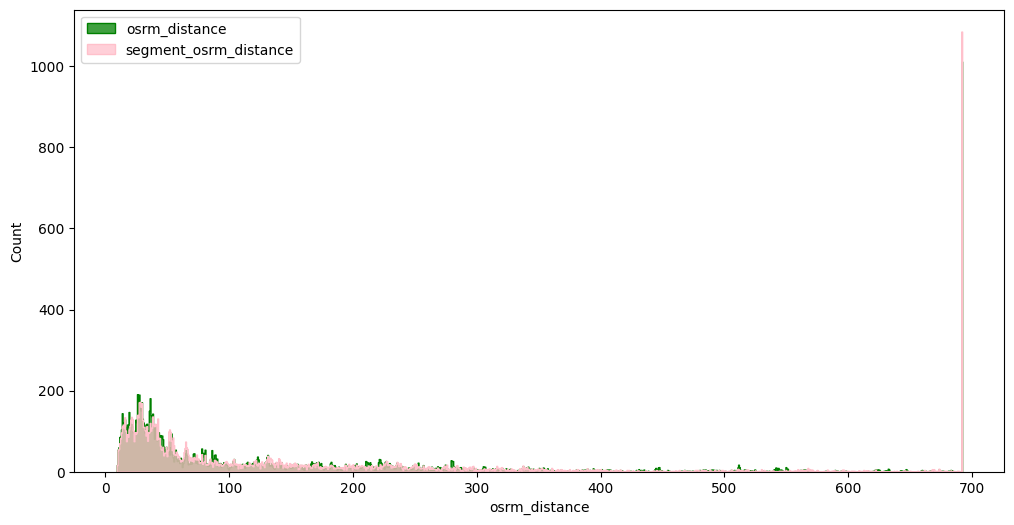

In [423]:
plt.figure(figsize = (12, 6))
sns.histplot(df_clipped['osrm_distance'], element = 'step', color = 'green', bins = 1000)
sns.histplot(df_clipped['segment_osrm_distance'], element = 'step', color = 'pink', bins = 1000)
plt.legend(['osrm_distance', 'segment_osrm_distance'])
plt.plot()

Distribution check using QQ Plot

[]

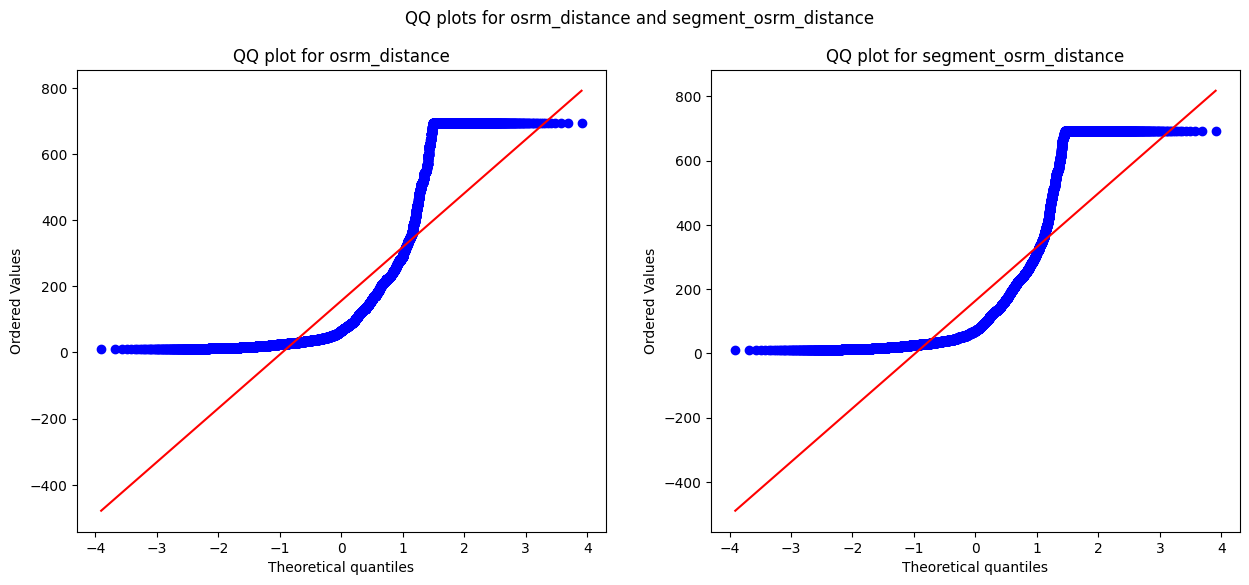

In [424]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_distance and segment_osrm_distance')
spy.probplot(df_clipped['osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')
plt.subplot(1, 2, 2)
spy.probplot(df_clipped['segment_osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_distance')
plt.plot()

It can be seen from the above plots that the samples do not come from normal distribution.


Applying Shapiro-Wilk test for normality
 H0 : The sample follows normal distribution
 Ha : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [425]:
test_stat, p_value = spy.shapiro(df_clipped['osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.1687551780281063e-68
The sample does not follow normal distribution


In [426]:
test_stat, p_value = spy.shapiro(df_clipped['segment_osrm_distance'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.883051485231325e-68
The sample does not follow normal distribution


Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [427]:
transformed_osrm_distance = spy.boxcox(df_clipped['osrm_distance'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_distance)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.542802000057594e-51
The sample does not follow normal distribution


In [428]:
transformed_segment_osrm_distance = spy.boxcox(df_clipped['segment_osrm_distance'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_osrm_distance)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.1641731490105593e-50
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the "osrm_distance" and "segment_osrm_distance" columns, the distributions do not follow normal distribution.


Homogeneity of Variances using Lavene's test

In [429]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df_clipped['osrm_distance'], df_clipped['segment_osrm_distance'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.013039732360819787
The samples do not have Homogenous Variance


Since the samples do not follow any of the assumptions, T-Test cannot be applied here. We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [430]:
test_stat, p_value = spy.mannwhitneyu(df_clipped['osrm_distance'], df_clipped['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 1.3056583795241463e-06
The samples are not similar


Since p-value < alpha therfore it can be concluded that osrm_distance and segment_osrm_distance are not similar.

**Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [431]:
df_clipped[['osrm_time', 'segment_osrm_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_time,14817.0,137.033558,175.338338,6.0,29.0,60.0,168.0,691.990952
segment_osrm_time,14817.0,147.060431,182.784183,6.0,31.0,65.0,185.0,691.990952


Visual Tests to know if the samples follow normal distribution

[]

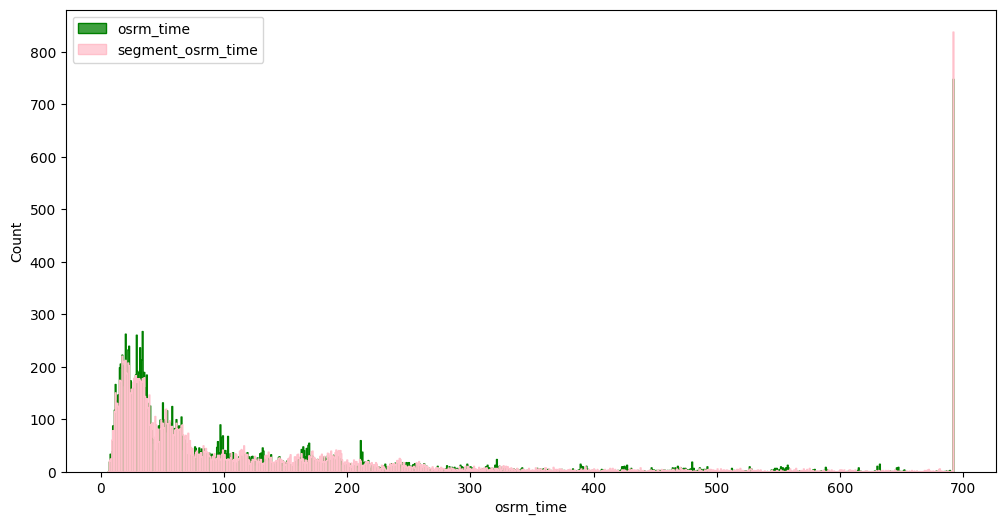

In [432]:
plt.figure(figsize = (12, 6))
sns.histplot(df_clipped['osrm_time'], element = 'step', color = 'green', bins = 1000)
sns.histplot(df_clipped['segment_osrm_time'], element = 'step', color = 'pink', bins = 1000)
plt.legend(['osrm_time', 'segment_osrm_time'])
plt.plot()

Distribution check using QQ Plot

[]

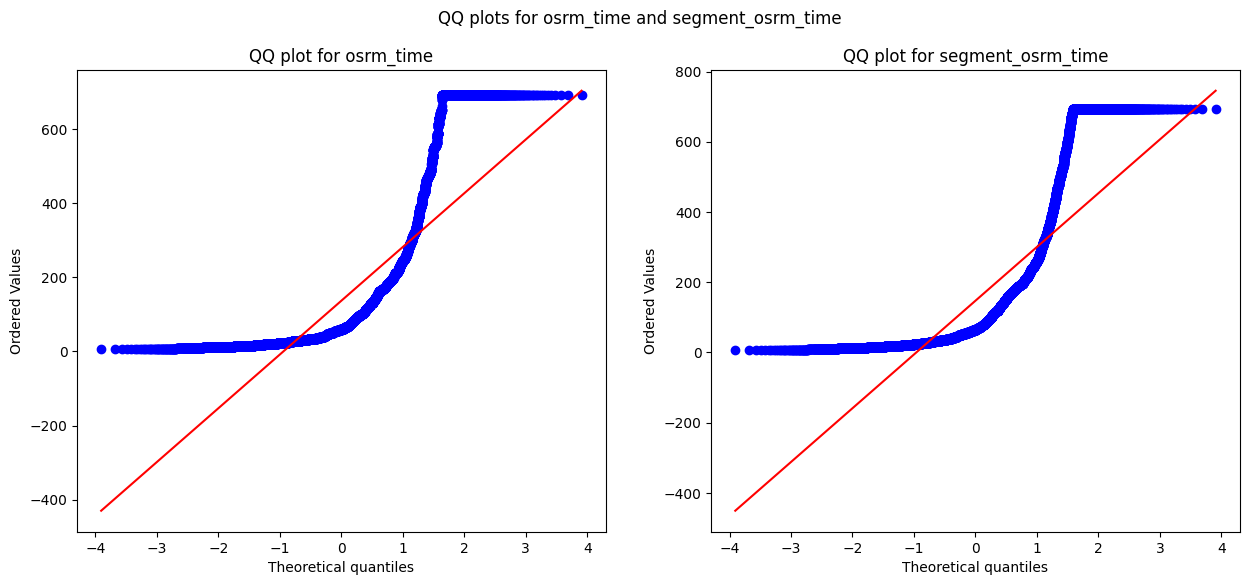

In [433]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_time and segment_osrm_time')
spy.probplot(df_clipped['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.subplot(1, 2, 2)
spy.probplot(df_clipped['segment_osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_time')
plt.plot()

It can be seen from the above plots that the samples do not come from normal distribution.


Applying Shapiro-Wilk test for normality
 H0 : The sample follows normal distribution
 Ha : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [434]:
test_stat, p_value = spy.shapiro(df_clipped['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.2837011030355646e-70
The sample does not follow normal distribution


In [435]:
test_stat, p_value = spy.shapiro(df_clipped['segment_osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.7593114670636977e-69
The sample does not follow normal distribution


Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [436]:
transformed_osrm_time = spy.boxcox(df_clipped['osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 9.072210814383864e-44
The sample does not follow normal distribution


In [437]:
transformed_segment_osrm_time = spy.boxcox(df_clipped['segment_osrm_time'])[0]
test_stat, p_value = spy.shapiro(transformed_segment_osrm_time)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 7.146068328501078e-45
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the "osrm_time" and "segment_osrm_time" columns, the distributions do not follow normal distribution.


Homogeneity of Variances using Lavene's test

In [438]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df_clipped['osrm_time'], df_clipped['segment_osrm_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 2.534993864187712e-05
The samples do not have Homogenous Variance


**Since the samples do not follow any of the assumptions, T-Test cannot be applied here. We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.**

In [439]:
test_stat, p_value = spy.mannwhitneyu(df_clipped['osrm_time'], df_clipped['segment_osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 3.429029063678771e-08
The samples are not similar


Since p-value < alpha therfore it can be concluded that osrm_time and segment_osrm_time are not similar.

## **One-hot encoding on categorical variables**

In [440]:
encoded_df= df2.copy()

In [441]:
# Get value counts after one-hot encoding

encoded_df['data'].value_counts()

,count
data,
training,10654
test,4163


In [442]:
encoded_df

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,...,destination_place,trip_creation_date,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_week,trip_creation_hour,corridor,state_corridor,city_corridor
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,...,Central_H_6,2018-09-12,12,9,2018,37,0,Kanpur_Central_H_6 (Uttar Pradesh) <---> Kanpu...,Uttar Pradesh--Kanpur <---> Uttar Pradesh--Kanpur,Kanpur--Central_H_6 <---> Kanpur--Central_H_6
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,...,ChikaDPP_D,2018-09-12,12,9,2018,37,0,Doddablpur_ChikaDPP_D (Karnataka) <---> Doddab...,Karnataka--Doddablpur <---> Karnataka--Doddablpur,Doddablpur--ChikaDPP_D <---> Doddablpur--Chika...
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,...,Bilaspur_HB,2018-09-12,12,9,2018,37,0,Gurgaon_Bilaspur_HB (Haryana) <---> Gurgaon_Bi...,Haryana--Gurgaon <---> Haryana--Gurgaon,Gurgaon--Bilaspur_HB <---> Gurgaon--Bilaspur_HB
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,...,MiraRd_IP,2018-09-12,12,9,2018,37,0,Mumbai Hub (Maharashtra) <---> Mumbai_MiraRd_I...,Maharashtra--Mumbai <---> Maharashtra--Mumbai,Mumbai--unknown_place <---> Mumbai--MiraRd_IP
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,...,WrdN1DPP_D,2018-09-12,12,9,2018,37,0,Bellary_Dc (Karnataka) <---> Sandur_WrdN1DPP_D...,Karnataka--Bellary <---> Karnataka--Sandur,Bellary--Dc <---> Sandur--WrdN1DPP_D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,trip-153861095625827784,IND160002AAC,IND160002AAC,test,Carting,2018-10-03 23:55:56.258533,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),258.03,257.0,...,Mehmdpur_H,2018-10-03,3,10,2018,40,23,Chandigarh_Mehmdpur_H (Punjab) <---> Chandigar...,Punjab--Chandigarh <---> Punjab--Chandigarh,Chandigarh--Mehmdpur_H <---> Chandigarh--Mehmd...
14813,trip-153861104386292051,IND121004AAB,IND121004AAA,test,Carting,2018-10-03 23:57:23.863155,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),60.59,60.0,...,Blbgarh_DC,2018-10-03,3,10,2018,40,23,FBD_Balabhgarh_DPC (Haryana) <---> Faridabad_B...,Haryana--Faridabad <---> Haryana--Faridabad,Faridabad--Balabhgarh_DPC <---> Faridabad--Blb...
14814,trip-153861106442901555,IND208006AAA,IND208006AAA,test,Carting,2018-10-03 23:57:44.429324,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),422.12,421.0,...,GovndNgr_DC,2018-10-03,3,10,2018,40,23,Kanpur_GovndNgr_DC (Uttar Pradesh) <---> Kanpu...,Uttar Pradesh--Kanpur <---> Uttar Pradesh--Kanpur,Kanpur--GovndNgr_DC <---> Kanpur--GovndNgr_DC
14815,trip-153861115439069069,IND627005AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),348.52,347.0,...,Shnmgprm_D,2018-10-03,3,10,2018,40,23,Tirunelveli_VdkkuSrt_I (Tamil Nadu) <---> Tirc...,Tamil Nadu--Tirunelveli <---> Tamil Nadu--Tirc...,Tirunelveli--VdkkuSrt_I <---> Tirchchndr--Shnm...


In [443]:
# Get value counts before one-hot encoding

encoded_df['route_type'].value_counts()

,count
route_type,
Carting,8908
FTL,5909


In [444]:
# Perform one-hot encoding on categorical column route type

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_df['route_type'] = label_encoder.fit_transform(encoded_df['route_type'])

In [445]:
# Get value counts after one-hot encoding

encoded_df['route_type'].value_counts()

,count
route_type,
0,8908
1,5909


In [446]:
# Get value counts of categorical variable 'data' before one-hot encoding

encoded_df['data'].value_counts()

,count
data,
training,10654
test,4163


In [447]:
# Perform one-hot encoding on categorical variable 'data'
label_encoder = LabelEncoder()
encoded_df['data'] = label_encoder.fit_transform(encoded_df['data'])

## **Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler**

In [448]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing/Standardizing the numerical features using MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaled_numerical = min_max_scaler.fit_transform(encoded_df[num_cols])
# Converting the scaled features back to a dataframe
min_max_scaled_df = pd.DataFrame(min_max_scaled_numerical, columns=num_cols)
min_max_scaled_df


,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,0.284016,0.283937,0.374613,0.248242,0.350938,0.346972,0.247388,0.391712,0.373134
1,0.020082,0.019937,0.029476,0.021419,0.030602,0.026859,0.021218,0.023065,0.021373
2,0.496617,0.496508,0.880999,0.533568,0.855874,0.828325,0.530301,0.756450,0.721625
3,0.009781,0.009778,0.003753,0.007992,0.004442,0.003747,0.008037,0.003909,0.003074
4,0.088238,0.088127,0.054395,0.053069,0.054788,0.048647,0.053207,0.042611,0.039185
...,...,...,...,...,...,...,...,...,...
14812,0.029786,0.029714,0.022392,0.011829,0.027641,0.022745,0.011734,0.021892,0.015872
14813,0.004715,0.004698,0.002990,0.001918,0.002962,0.002478,0.001929,0.001955,0.001996
14814,0.050623,0.050540,0.013631,0.043638,0.020731,0.017602,0.043723,0.032056,0.027262
14815,0.041277,0.041143,0.057736,0.040761,0.085390,0.057237,0.040026,0.084050,0.061020


## **Business Insights**

EDA:
1. The Timeframe of the data is '2018-09-12' to '2018-10-08' i.e(26 days).
88% of the trips are from October Month & remaining are from November
2. The entire data is heavily right skewed
3. Almost all the features are heavy positively correleated with each other & which is intutive as well.
4. Start & End dates of the months have less percent of trips compare to mid of the month. Though the difference is not huge.
5. Thats very strange to see that there is absolutely no trip from 4th- 11th day of the month
6. Most orders come mid-month. That means customers usually make more orders in the mid of the month.


Route Type:

*  The analysis shows that a greater share of shipments is handled via Full Truck Load (FTL) rather than carting, which has significant implications for enhancing delivery efficiency and speed.

Geographical Focus:

1.  State- The states of Haryana, Maharashtra, and Karnataka are not only busy source states but also emerge as the busiest source states, indicating a high demand or significant business activities originating from these
regions

2.  Source Cities - Gurgaon, Bangalore, and Bhiwandi emerge as the busiest source cities, indicating their critical role in supporting overall business operations and transportation activities.

3. Destination Cities - Gurgaon, Bangalore, and Hyderabad are identified as the busiest destination cities, highlighting their importance in terms of business activities and population movement.

4. Busiest Corridor - The busiest transportation corridor is between Mumbai, Maharashtra and Bangalore, Karnataka, accounting for the highest number of trips.

5.  Delivery Metrics
  Average Distance: 74.85 km
  Average Time: 5.35 hours

6. Delivery Time and Distance Accuracy

    *  OSRM Estimated Time vs Actual Time:
The mean actual delivery time is greater than the estimated OSRM time, indicating that OSRM tends to provide optimistic delivery estimates. This gap suggests potential delays in the real-world delivery process compared to initial projections.

    *  OSRM Estimated Distance vs Actual Distance:
The mean OSRM distance is higher than the actual distance traveled, suggesting a slight overestimation by the OSRM service. This discrepancy could affect route optimization and fuel efficiency calculations.

    *  Segment-wise Time Analysis:
The equality between the mean actual time and the segment-wise actual time indicates consistency in time measurements across different segments of the delivery process.

    *  Segment-wise Distance Analysis:
The mean segment-wise OSRM distance being greater than the overall OSRM distance suggests that OSRM provides more conservative distance estimates for individual segments.

Further Analysis:

1. Gaps in Trip Data:
No trips are recorded between the 4th and 11th day of the month. Investigating the reasons for this gap could help uncover opportunities to boost order volume during this period.

2. Promotion of FTL (Full Truck Load) Handling:
Given the strong usage of FTL routing, further initiatives to promote and optimize the FTL handling system could enhance operational efficiency and improve delivery performance.

## **Business Recommendations**

**Route Optimization**:

* Optimize Karnataka’s transportation network using route optimization algorithms and real-time traffic monitoring.

*  Focus on Gurgaon and Bangalore with city-specific strategies to manage heavy traffic.

**Operational Efficiency**:

*  Set more realistic delivery expectations, as actual delivery times exceed OSRM estimates.

*  Refine distance estimations for better logistics planning and cost control.

*  Implement demand forecasting to optimize resources during peak times.

**Customer Satisfaction**:
*  Improve accuracy in estimated delivery times and distances to enhance customer trust.

*  Promote FTL shipments to ensure faster, more reliable deliveries.

**Customer Profiling**:

*  Profile customers from Maharashtra, Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh to better understand demand patterns and improve services.

**Cost Optimization**:

*  Address discrepancies between estimated and actual times/distances for better resource planning and reduced operational costs.

**Strategic Decision-Making:**

* Regularly evaluate the preference for FTL to align logistics strategies with evolving business needs.

**Collaboration with Stakeholders**:

*  Partner with government bodies, transport companies, and communities to manage and optimize traffic in key corridors and cities.